<a id="1"></a>
## 1.Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [2]:
df=pd.read_csv("/kaggle/input/carinsuranceclaimprediction-classification/train.csv")
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

In [3]:
df.tail()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment model fuel_type  ... is_brake_assist  \
58587                8794     2       A    M3    Petrol  ...              No   
58588                7788     1       A    M1       CNG  ...              No   
58589               34738     1       A    M1       CNG  ...              No   
58590                8794     1      B2    M6    Petrol  ...             Yes   
58591                8794     3      C2    M4    Diesel  ...             Yes   

      is_power_door_locks is_central_locking  is_power_steering  \
58587                 Yes                Yes                Yes   
58588                  No                 No                Yes   
58589                  No                 No                Yes   
58590                 Yes                Yes                Yes   
58591                 Yes                Yes                Yes   

      is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
58587                               No                           Yes    Yes   
58588                               No                            No     No   
58589                               No                            No     No   
58590                              Yes                           Yes    Yes   
58591                              Yes                            No    Yes   

      is_speed_alert ncap_rating is_claim  
58587            Yes           2        0  
58588            Yes           0        0  
58589            Yes           0        0  
58590            Yes           2        0  
58591            Yes           3        0  

[5 rows x 44 columns]

<a id="3"></a>
## 3.EDA

In [4]:
df.drop("policy_id",axis=1,inplace=True)

In [23]:
df.shape

(58592, 22)

In [52]:
# Our dataset consists of 58592 observations and 43 attributes

In [53]:
# columns
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [54]:
#datatypes

df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [55]:
# structural information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [11]:
# Our dataset consists of 16 numeric, 27 categorical values, no missing values

In [12]:
#describe

df.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

In [13]:
df.describe([0.05,0.1,0.25,0.5,0.65,0.75,0.85,0.9,0.95]).T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                              5%          10%          25%          50%  \
policy_tenure           0.042945     0.081874     0.210250     0.573792   
age_of_car              0.000000     0.010000     0.020000     0.060000   
age_of_policyholder     0.298077     0.317308     0.365385     0.451923   
population_density   4076.000000  4076.000000  6112.000000  8794.000000   
make                    1.000000     1.000000     1.000000     1.000000   
airbags                 2.000000     2.000000     2.000000     2.000000   
displacement          796.000000   796.000000   796.000000  1197.000000   
cylinder                3.000000     3.000000     3.000000     4.000000   
gear_box                5.000000     5.000000     5.000000     5.000000   
turning_radius          4.600000     4.600000     4.600000     4.800000   
length               3445.000000  3445.000000  3445.000000  3845.000000   
width                1515.000000  1515.000000  1515.000000  1735.000000   
height               1475.000000  1475.000000  1475.000000  1530.000000   
gross_weight         1155.000000  1185.000000  1185.000000  1335.000000   
ncap_rating             0.000000     0.000000     0.000000     2.000000   
is_claim                0.000000     0.000000     0.000000     0.000000   

                              65%           75%           85%           90%  \
policy_tenure            0.881398      1.039104      1.116899      1.159637   
age_of_car               0.090000      0.110000      0.130000      0.150000   
age_of_policyholder      0.509615      0.548077      0.605769      0.644231   
population_density   27003.000000  27003.000000  34738.000000  34738.000000   
make                     1.000000      3.000000      3.000000      3.000000   
airbags                  2.000000      6.000000      6.000000      6.000000   
displacement          1197.000000   1493.000000   1493.000000   1493.000000   
cylinder                 4.000000      4.000000      4.000000      4.000000   
gear_box                 5.000000      5.000000      6.000000      6.000000   
turning_radius           4.850000      5.000000      5.200000      5.200000   
length                3990.000000   3995.000000   4300.000000   4300.000000   
width                 1735.000000   1755.000000   1790.000000   1790.000000   
height                1530.000000   1635.000000   1635.000000   1635.000000   
gross_weight          1340.000000   1510.000000   1720.000000   1720.000000   
ncap_rating              2.000000      3.000000      3.000000      3.000000   
is_claim                 0.000000      0.000000      0.000000      0.000000   

                              95%           max  
policy_tenure            1.204138      1.396641  
age_of_car               0.170000      1.000000  
age_of_poli

In [14]:
# unique value counts

In [15]:
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

In [5]:
#Let's delete #policy_tenure
df.drop("policy_tenure",axis=1,inplace=True)
df.head(2)

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0        0.05             0.644231           C1                4990     1   
1        0.02             0.375000           C2               27003     1   

  segment model fuel_type    max_torque         max_power  ...  \
0       A    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   
1       A    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0              No                   No                 No               Yes   
1              No                   No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  

[2 rows x 42 columns]

In [7]:
df.max_power.unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [18]:
# displacement

df.sort_values("displacement",ascending=False).head(15)

age_of_car  age_of_policyholder area_cluster  population_density  make  \
45288        0.09             0.317308           C2               27003     5   
47325        0.08             0.432692          C15                 290     5   
31409        0.17             0.461538          C10               73430     5   
31410        0.12             0.326923           C2               27003     5   
42422        0.18             0.500000           C2               27003     5   
19774        0.15             0.548077           C5               34738     5   
49885        0.10             0.480769           C2               27003     5   
52116        0.09             0.355769           C6               13051     5   
39247        0.07             0.317308          C10               73430     5   
55623        0.05             0.307692           C2               27003     5   
55618        0.15             0.471154           C4               21622     5   
39250        0.09             0.451923           C9               17804     5   
42409        0.03             0.500000          C14                7788     5   
2584         0.10             0.432692           C5               34738     5   
5767         0.12             0.326923           C1                4990     5   

      segment model fuel_type     max_torque         max_power  ...  \
45288      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
47325      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
31409      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
31410      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
42422      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
19774      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
49885      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
52116      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
39247      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
55623      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
55618      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
39250      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
42409      C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
2584       C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   
5767       C1    M9    Diesel  200Nm@1750rpm  97.89bhp@3600rpm  ...   

      is_brake_assist  is_power_door_locks is_central_locking  \
45288              No                  Yes                Yes   
47325              No                  Yes                Yes   
31409              No                  Yes                Yes   
31410              No                  Yes                Yes   
42422              No                  Yes                Yes   
19774              No                  Yes                Yes   
49885              No                  Yes                Yes   
52116              No                  Yes                Yes   
39247              No                  Yes                Yes   
55623              No                  Yes                Yes   
55618              No                  Yes                Yes   
39250              No                  Yes                Yes   
42409              No                  Yes                Yes   
2584               No                  Yes                Yes   
5767               No                  Yes                Yes   

      is_power_steering is_driver_seat_height_adjustable  \
45288               Yes                              Yes   
47325               Yes                              Yes   
31409               Yes                              Yes   
31410               Yes                              Yes   
42422               Yes                              Yes   
19774               Yes                              Yes   
49885               Yes                              Yes   
52116               Yes                             

In [19]:
# segment

df.groupby("segment")[["displacement","is_claim"]].describe().T

segment                        A           B1            B2           C1  \
displacement count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean     823.811270   998.000000   1223.176695  1376.094743   
             std       69.803312     0.000000     84.665109   147.572646   
             min      796.000000   998.000000   1197.000000  1197.000000   
             25%      796.000000   998.000000   1197.000000  1197.000000   
             50%      796.000000   998.000000   1197.000000  1498.000000   
             75%      796.000000   998.000000   1197.000000  1498.000000   
             max      999.000000   998.000000   1497.000000  1498.000000   
is_claim     count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean       0.060389     0.058471      0.068581     0.064099   
             std        0.238213     0.234660      0.252748     0.244964   
             min        0.000000     0.000000      0.000000     0.000000   
             25%        0.000000     0.000000      0.000000     0.000000   
             50%        0.000000     0.000000      0.000000     0.000000   
             75%        0.000000     0.000000      0.000000     0.000000   
             max        1.000000     1.000000      1.000000     1.000000   

segment                       C2      Utility  
displacement count  14018.000000  1209.000000  
             mean    1493.000000  1196.000000  
             std        0.000000     0.000000  
             min     1493.000000  1196.000000  
             25%     1493.000000  1196.000000  
             50%     1493.000000  1196.000000  
             75%     1493.000000  1196.000000  
             max     1493.000000  1196.000000  
is_claim     count  14018.000000  1209.000000  
             mean       0.064275     0.060380  
             std        0.245250     0.238289  
             min        0.000000     0.000000  
             25%        0.000000     0.000000  
             50%        0.000000     0.000000  
             75%        0.000000     0.000000  
             max        1.000000     1.000000

In [20]:
df.select_dtypes("int").describe()

population_density          make       airbags  displacement  \
count        58592.000000  58592.000000  58592.000000  58592.000000   
mean         18826.858667      1.763722      3.137066   1162.355851   
std          17660.174792      1.136988      1.832641    266.304786   
min            290.000000      1.000000      1.000000    796.000000   
25%           6112.000000      1.000000      2.000000    796.000000   
50%           8794.000000      1.000000      2.000000   1197.000000   
75%          27003.000000      3.000000      6.000000   1493.000000   
max          73430.000000      5.000000      6.000000   1498.000000   

           cylinder      gear_box        length         width       height  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.00000   
mean       3.626963      5.245443   3850.476891   1672.233667   1553.33537   
std        0.483616      0.430353    311.457119    112.089135     79.62227   
min        3.000000      5.000000   3445.000000   1475.000000   1475.00000   
25%        3.000000      5.000000   3445.000000   1515.000000   1475.00000   
50%        4.000000      5.000000   3845.000000   1735.000000   1530.00000   
75%        4.000000      5.000000   3995.000000   1755.000000   1635.00000   
max        4.000000      6.000000   4300.000000   1811.000000   1825.00000   

       gross_weight   ncap_rating      is_claim  
count  58592.000000  58592.000000  58592.000000  
mean    1385.276813      1.759950      0.063968  
std      212.423085      1.389576      0.244698  
min     1051.000000      0.000000      0.000000  
25%     1185.000000      0.000000      0.000000  
50%     1335.000000      2.000000      0.000000  
75%     1510.000000      3.000000      0.000000  
max     1720.000000      5.000000      1.000000

In [20]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*30)

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
******************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
******************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
******************************
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
******************************
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm

In [21]:
# We have accessed the element counts of each of the categorical variables


In [21]:
df[df.population_density==73430]

age_of_car  age_of_policyholder area_cluster  population_density  make  \
13           0.10             0.307692          C10               73430     1   
33           0.15             0.480769          C10               73430     1   
71           0.04             0.615385          C10               73430     1   
77           0.13             0.384615          C10               73430     3   
82           0.13             0.403846          C10               73430     1   
...           ...                  ...          ...                 ...   ...   
58510        0.10             0.394231          C10               73430     1   
58512        0.07             0.509615          C10               73430     1   
58557        0.18             0.519231          C10               73430     1   
58561        0.04             0.326923          C10               73430     1   
58572        0.14             0.394231          C10               73430     3   

      segment model fuel_type      max_torque          max_power  ...  \
13         B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
33         B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
71         B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
77         C2    M4    Diesel   250Nm@2750rpm  113.45bhp@4000rpm  ...   
82         B1    M8       CNG  82.1Nm@3400rpm   55.92bhp@5300rpm  ...   
...       ...   ...       ...             ...                ...  ...   
58510      B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
58512      B1    M8       CNG  82.1Nm@3400rpm   55.92bhp@5300rpm  ...   
58557      B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
58561      B2    M6    Petrol   113Nm@4400rpm   88.50bhp@6000rpm  ...   
58572      C2    M4    Diesel   250Nm@2750rpm  113.45bhp@4000rpm  ...   

      is_brake_assist  is_power_door_locks is_central_locking  \
13                Yes                  Yes                Yes   
33                Yes                  Yes                Yes   
71                Yes                  Yes                Yes   
77                Yes                  Yes                Yes   
82                 No                  Yes                Yes   
...               ...                  ...                ...   
58510             Yes                  Yes                Yes   
58512              No                  Yes                Yes   
58557             Yes                  Yes                Yes   
58561             Yes                  Yes                Yes   
58572             Yes                  Yes                Yes   

      is_power_steering is_driver_seat_height_adjustable  \
13                  Yes                              Yes   
33                  Yes                              Yes   
71                  Yes                              Yes   
77                  Yes                              Yes   
82                  Yes                               No   
...                 ...                              ...   
58510               Yes                              Yes   
58512               Yes                               No   
58557               Yes                              Yes   
58561               Yes                              Yes   
58572               Yes                              Yes   

      is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  \
13                              Yes    Yes            Yes            2   
33                              Yes    Yes            Yes            2   
71                              Yes    Yes            Yes            2   
77                               No    Yes            Yes            3   
82                               No    Yes            Yes            2   
...                             ...    ...            ...          ...   
58510                           Yes    Yes            Yes            2   
58512                            No    Yes            Yes      

<a id="4"></a>
## 4.Data Preprocessing

In [24]:
df.isna().sum()

age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height      

In [25]:
# no missing value

In [26]:
# Let's create 2 lists to observe numeric and categorical values

In [6]:
cat_list=[]
num_list=[]

for i in df.columns:
    unique_val=len(df[i].unique())
    
    if unique_val<15:
        cat_list.append(i)
    else:
        num_list.append(i)

In [30]:
cat_list

['make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim']

In [31]:
num_list

['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']

In [30]:
df.loc[:,num_list]

age_of_car  age_of_policyholder area_cluster  population_density
0            0.05             0.644231           C1                4990
1            0.02             0.375000           C2               27003
2            0.02             0.384615           C3                4076
3            0.11             0.432692           C4               21622
4            0.11             0.634615           C5               34738
...           ...                  ...          ...                 ...
58587        0.13             0.644231           C8                8794
58588        0.02             0.519231          C14                7788
58589        0.05             0.451923           C5               34738
58590        0.14             0.557692           C8                8794
58591        0.02             0.442308           C8                8794

[58592 rows x 4 columns]

In [31]:
# area_cluster is not a numeric variable, let's add it to the category

In [7]:
num_list.remove("area_cluster")
cat_list.append("area_cluster")

In [10]:
df.loc[:,num_list].head(2)

age_of_car  age_of_policyholder  population_density
0        0.05             0.644231                4990
1        0.02             0.375000               27003

In [34]:
# observe the distributions of numerical variables

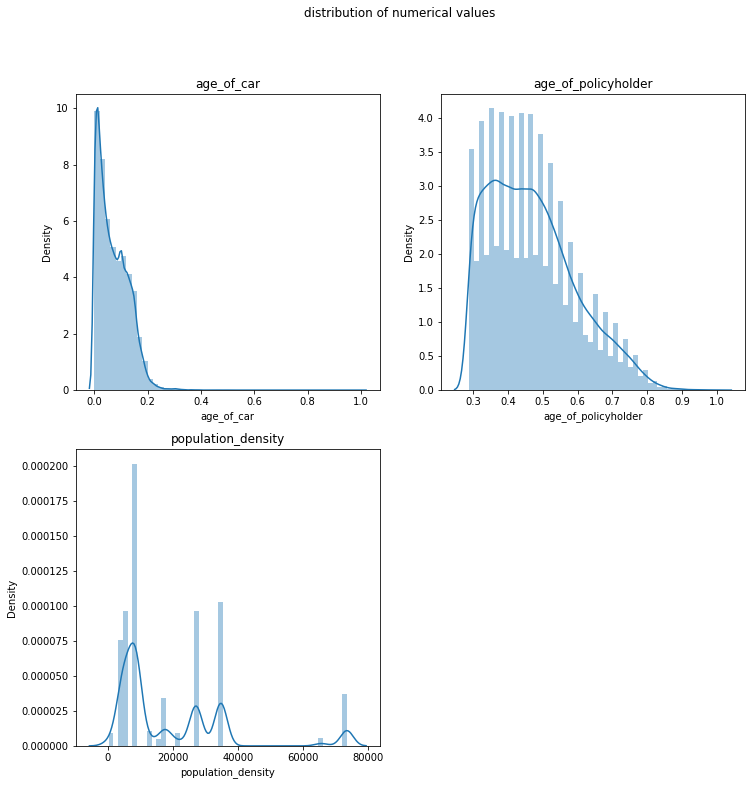

In [35]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in df.loc[:,num_list]:
    plt.subplot(2,2,k)    
    sns.distplot(df[i])
    plt.title(i)
    k+=1

In [36]:
df.loc[:,num_list].describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

count          mean           std         min  \
age_of_car           58592.0      0.069424      0.056721    0.000000   
age_of_policyholder  58592.0      0.469420      0.122886    0.288462   
population_density   58592.0  18826.858667  17660.174792  290.000000   

                              5%          10%          25%          35%  \
age_of_car              0.000000     0.010000     0.020000     0.030000   
age_of_policyholder     0.298077     0.317308     0.365385     0.403846   
population_density   4076.000000  4076.000000  6112.000000  8794.000000   

                             50%           65%           75%           90%  \
age_of_car              0.060000      0.090000      0.110000      0.150000   
age_of_policyholder     0.451923      0.509615      0.548077      0.644231   
population_density   8794.000000  27003.000000  27003.000000  34738.000000   

                              95%      max  
age_of_car               0.170000      1.0  
age_of_policyholder      0.701923      1.0  
population_density   73430.000000  73430.0

* There is any outlier in our dataset, we will not perform outlier removal


### Data Visualize

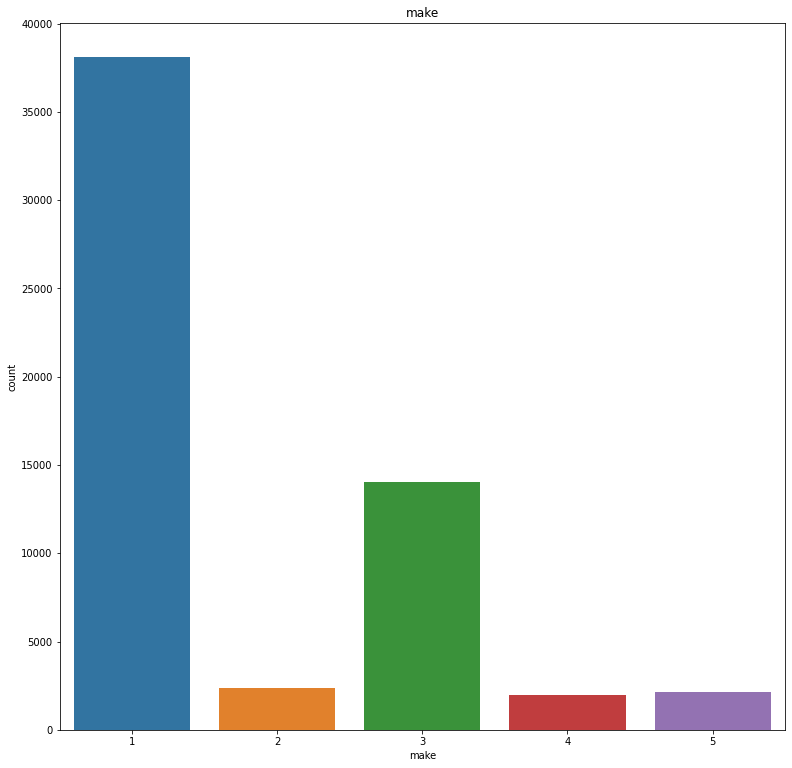

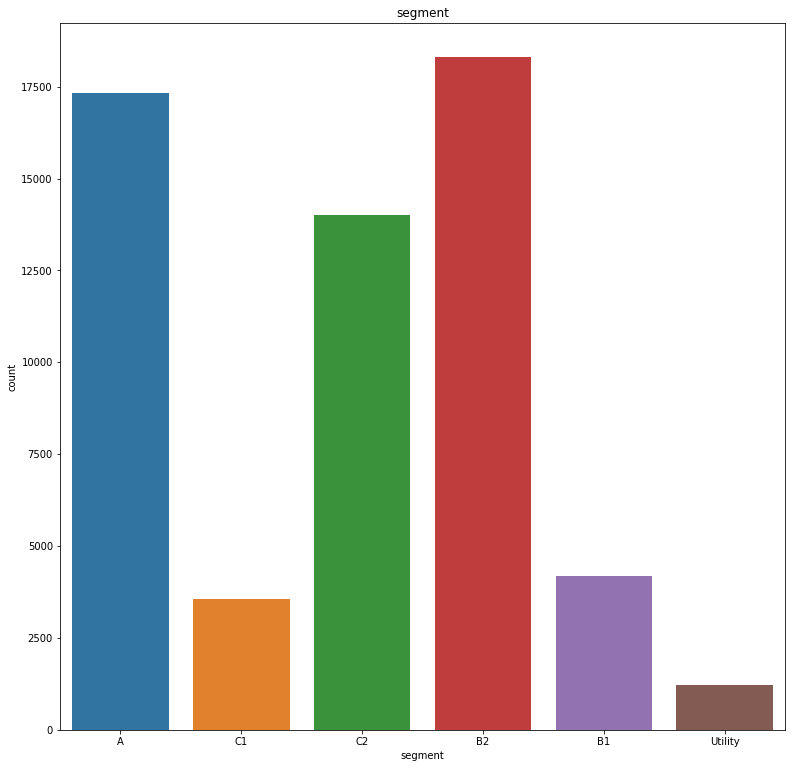

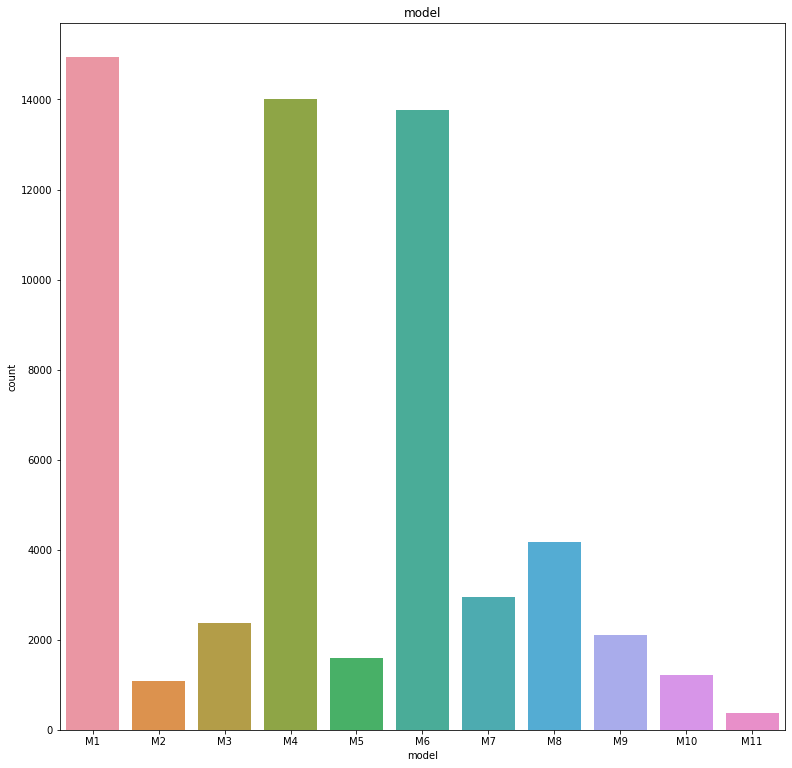

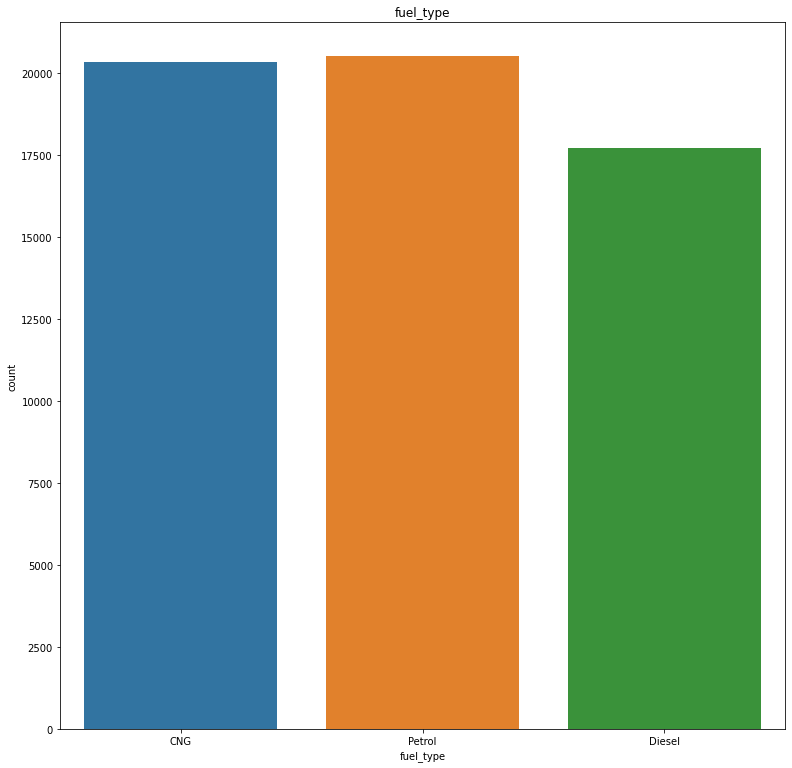

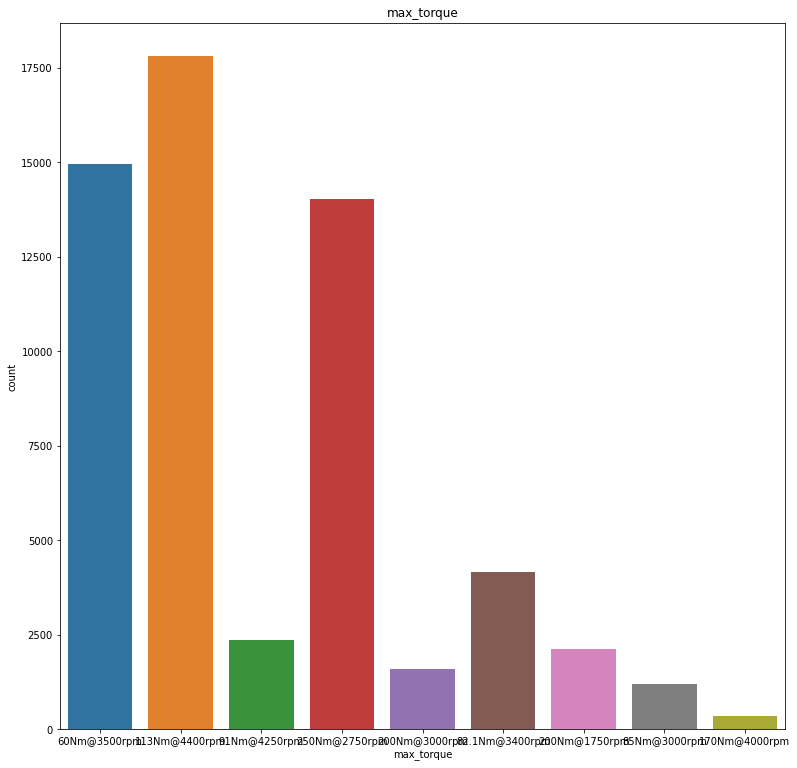

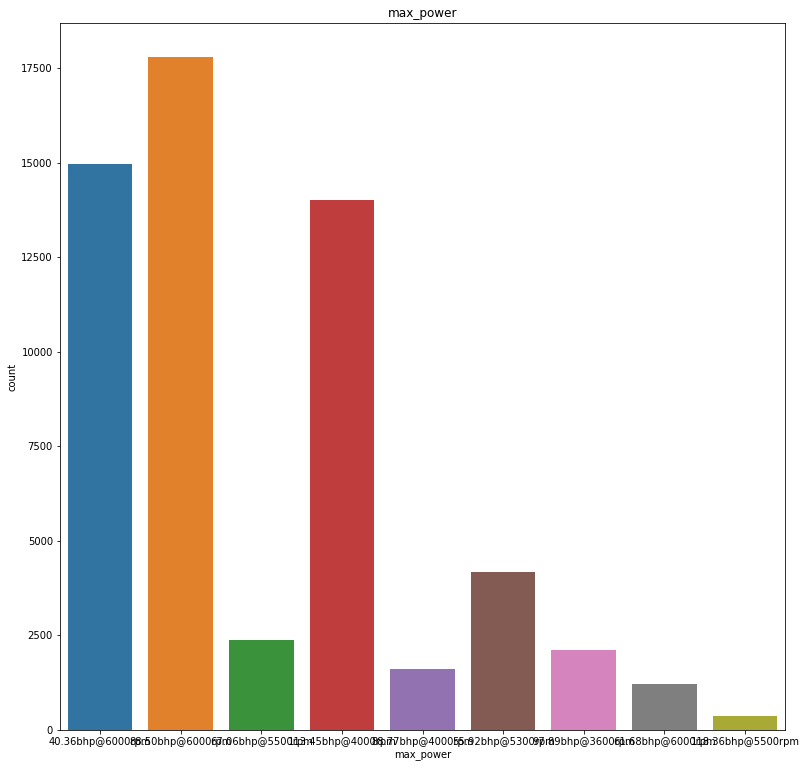

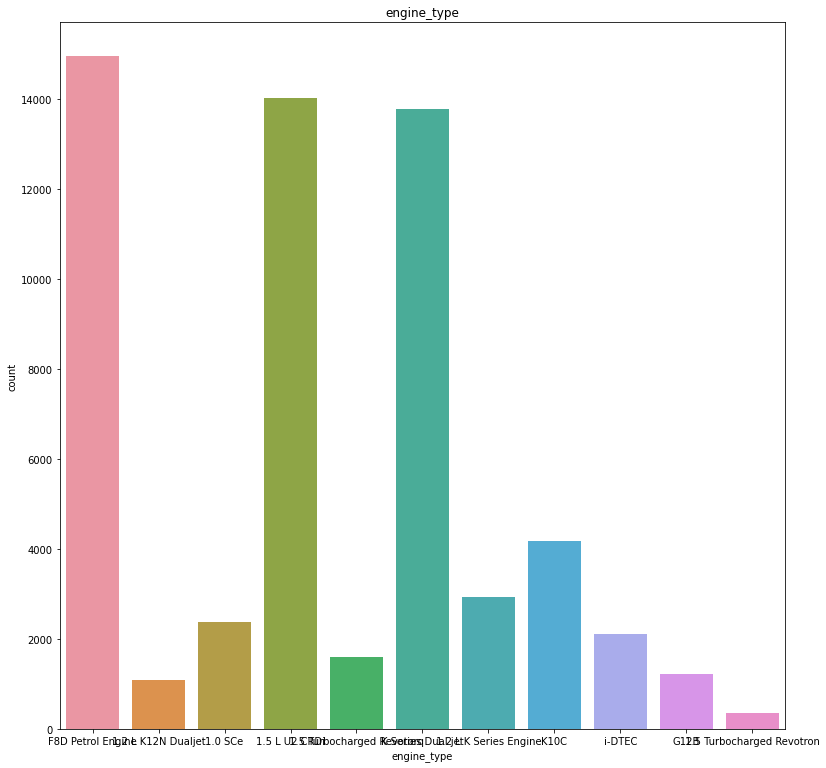

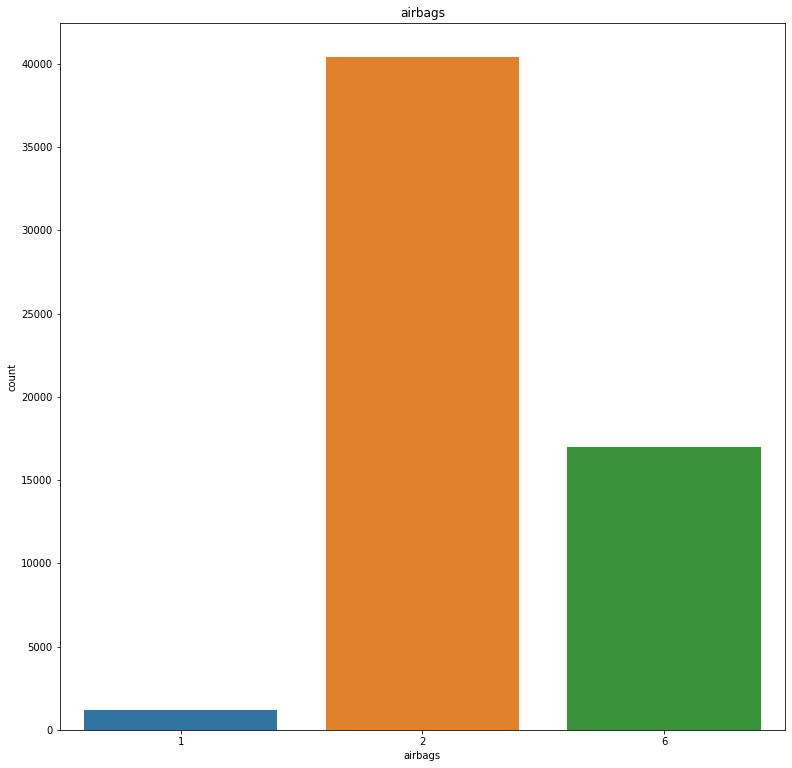

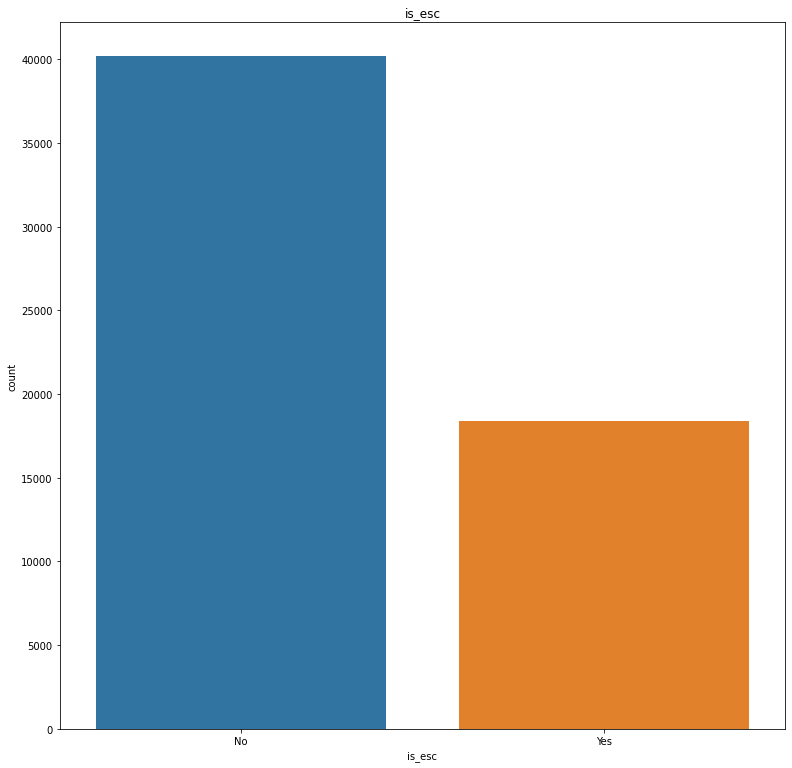

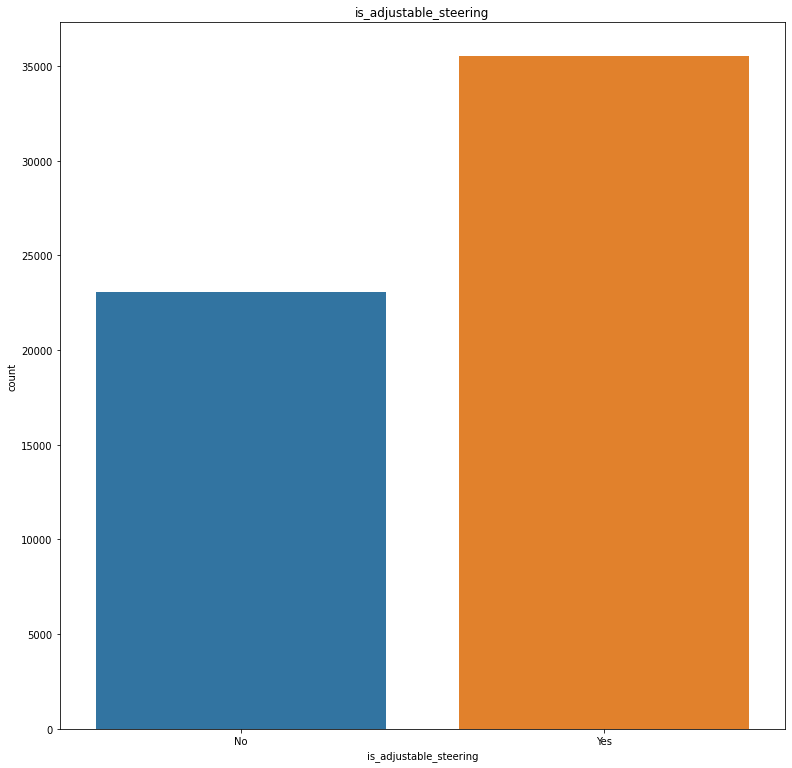

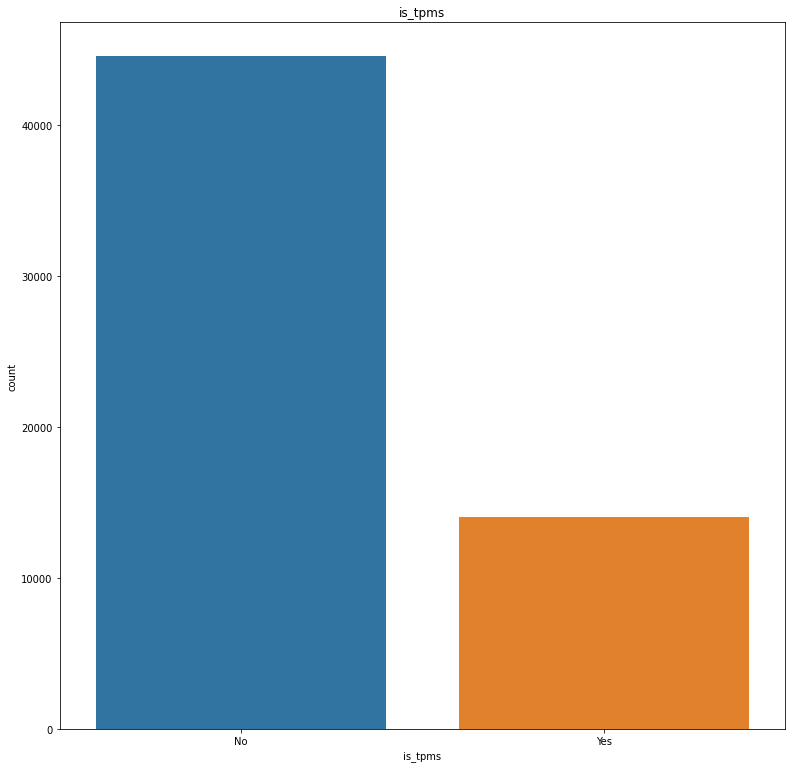

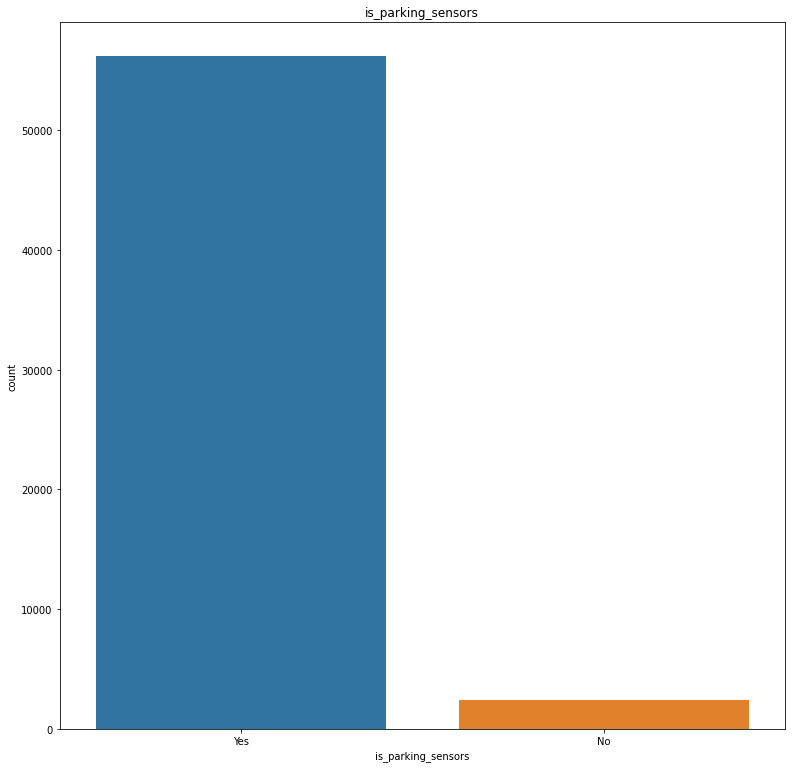

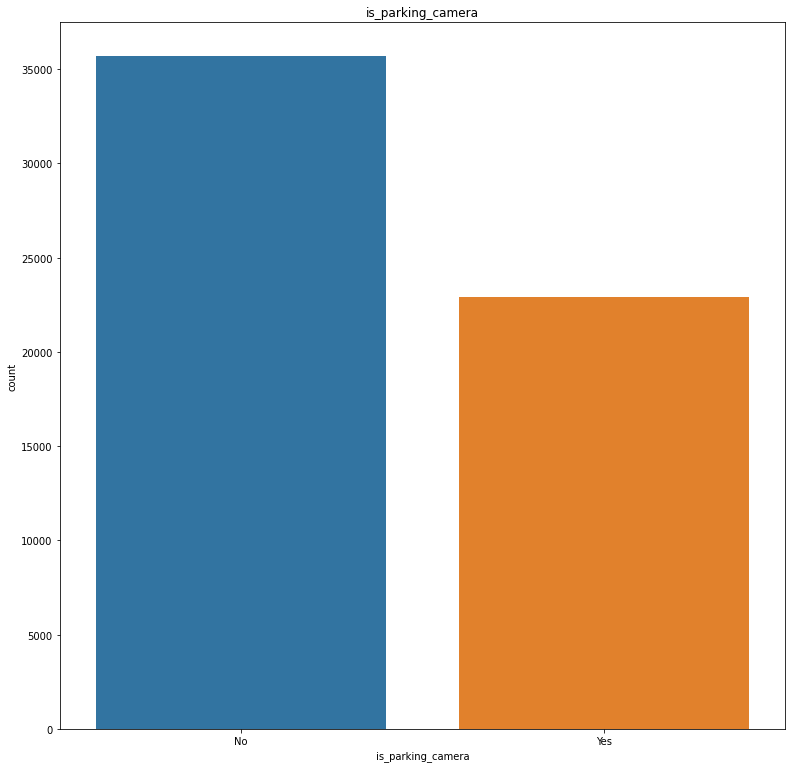

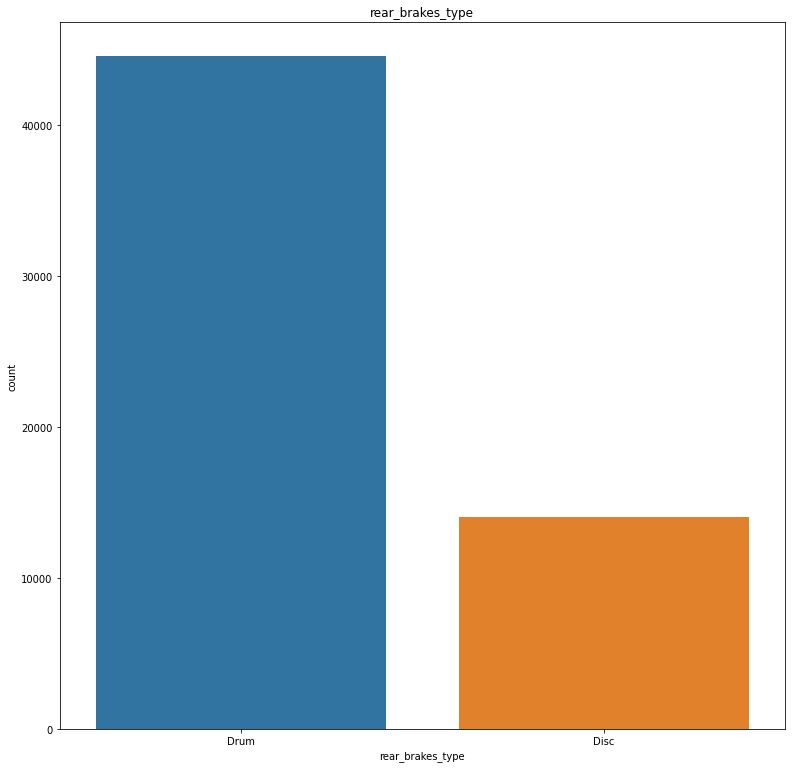

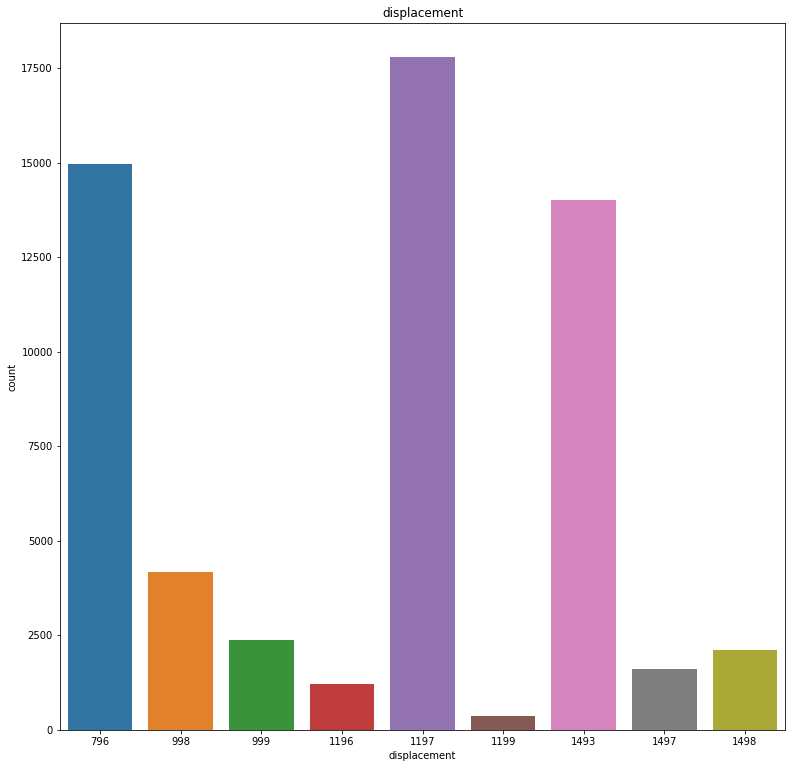

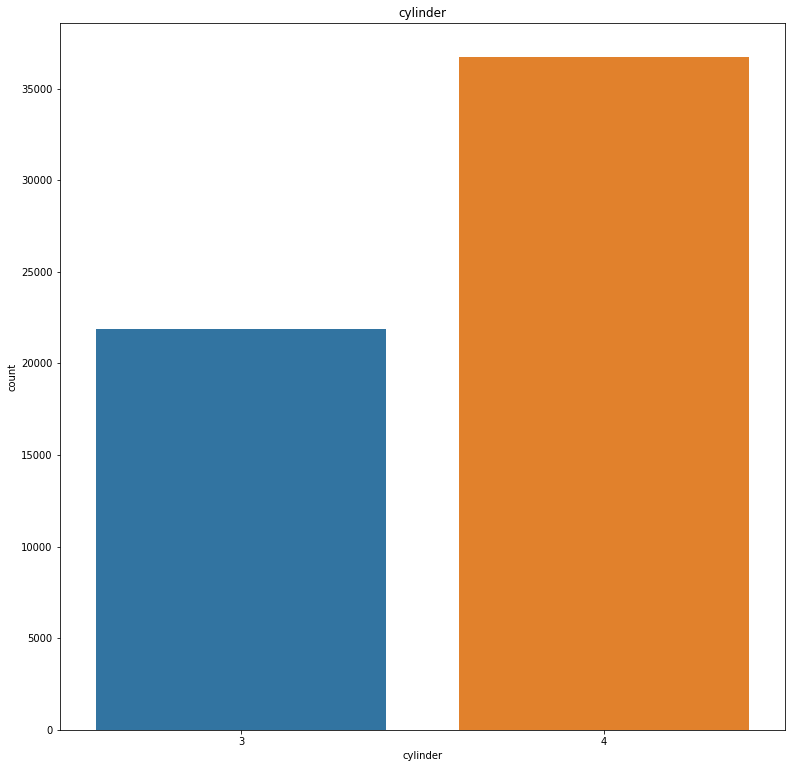

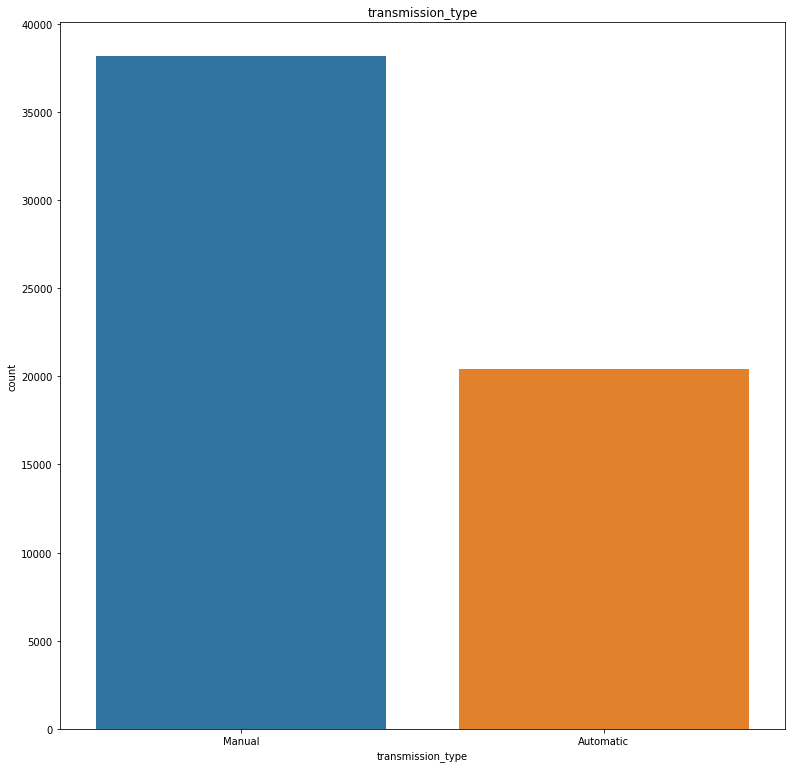

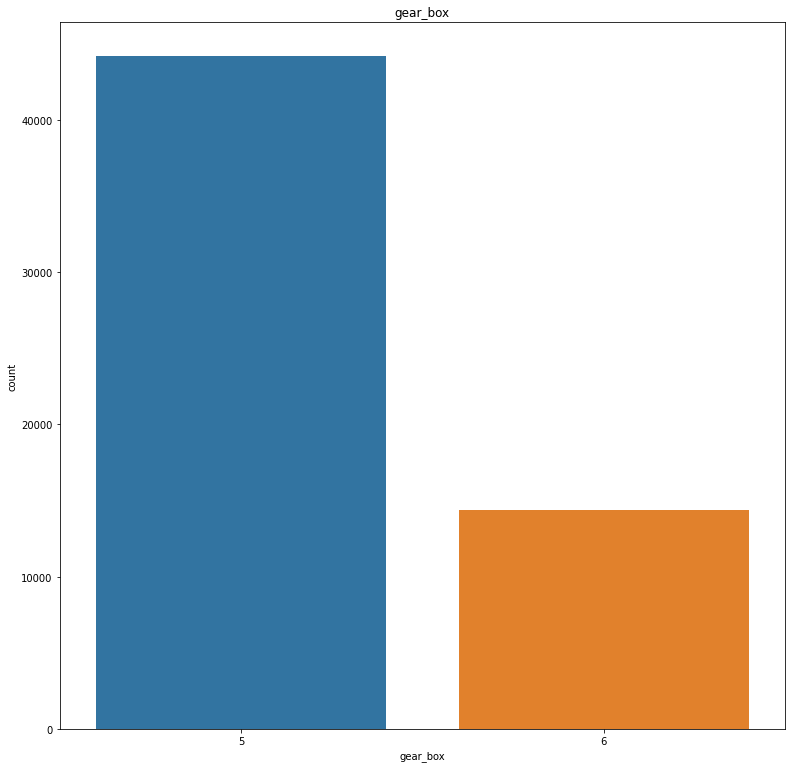

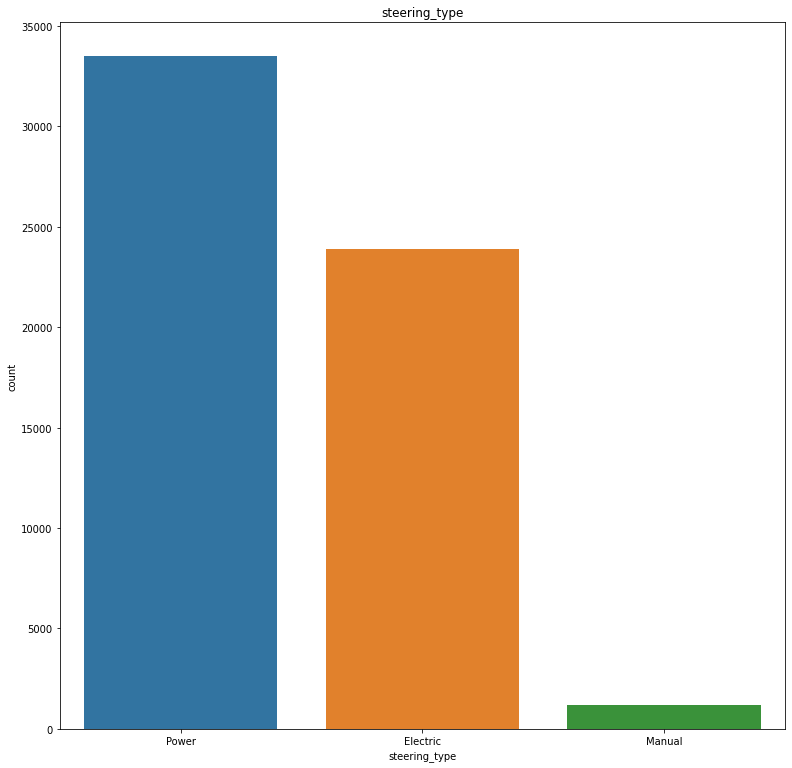

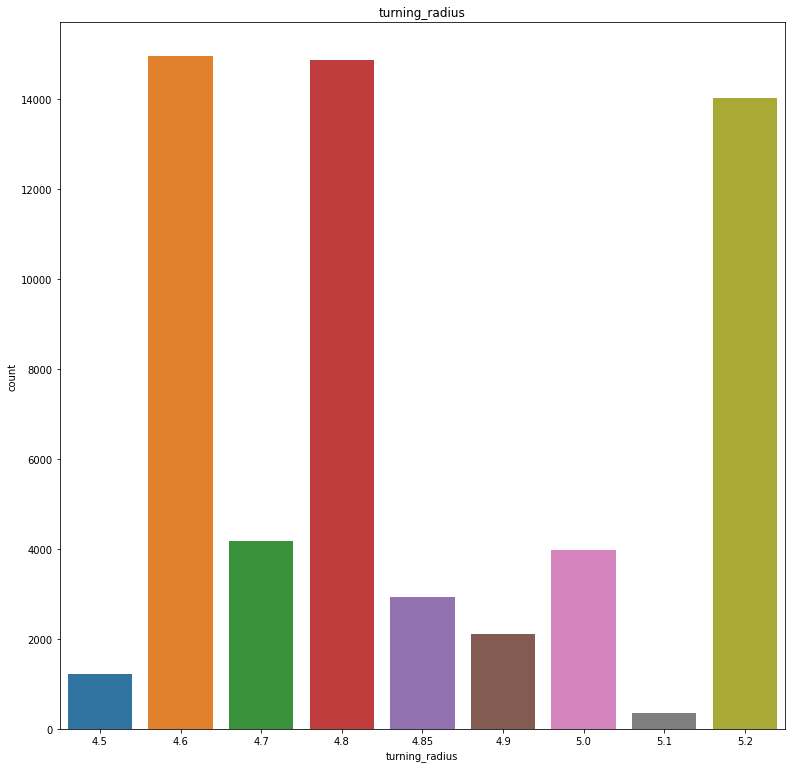

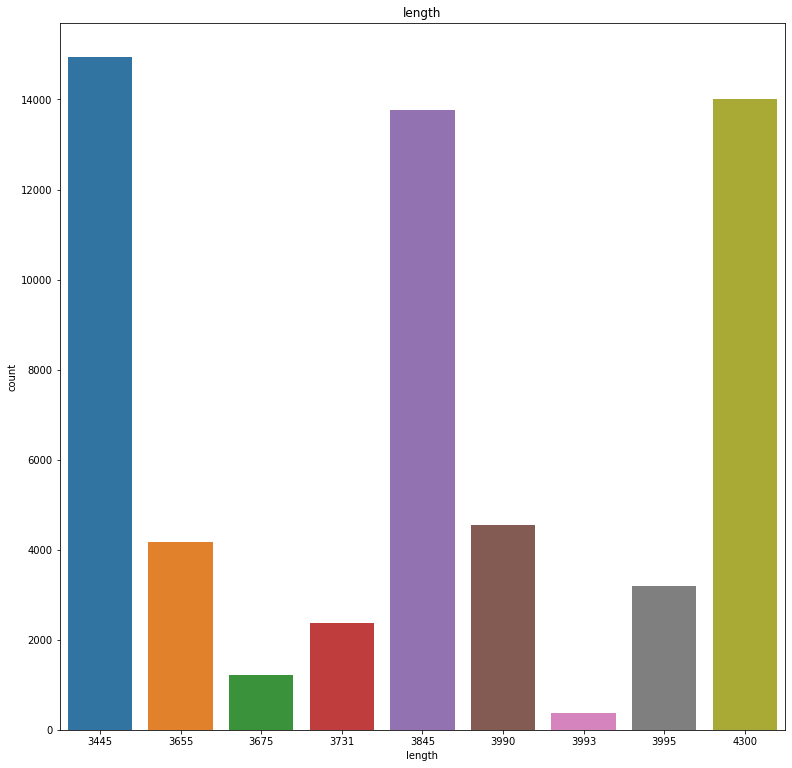

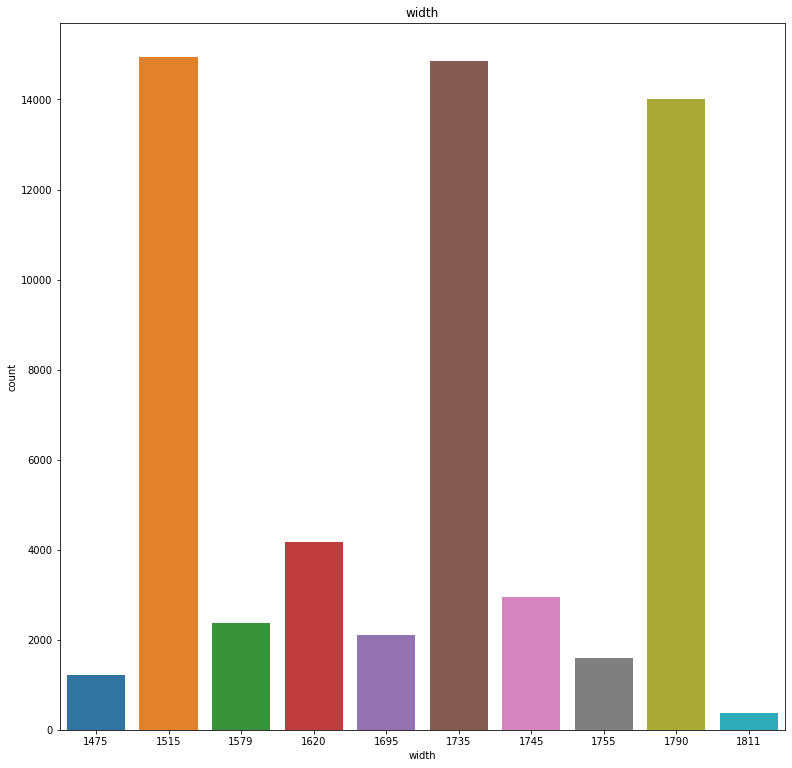

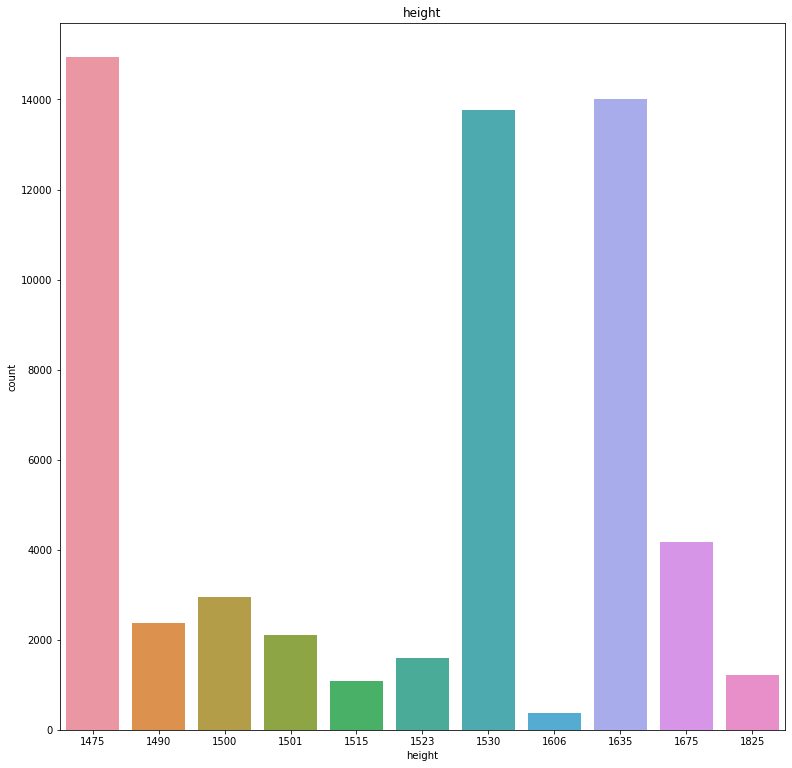

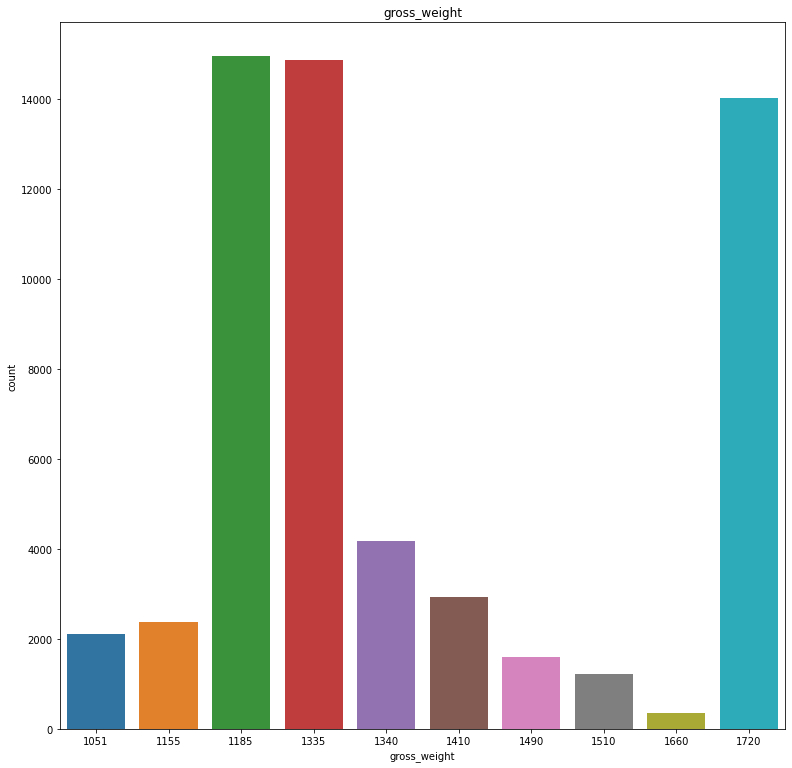

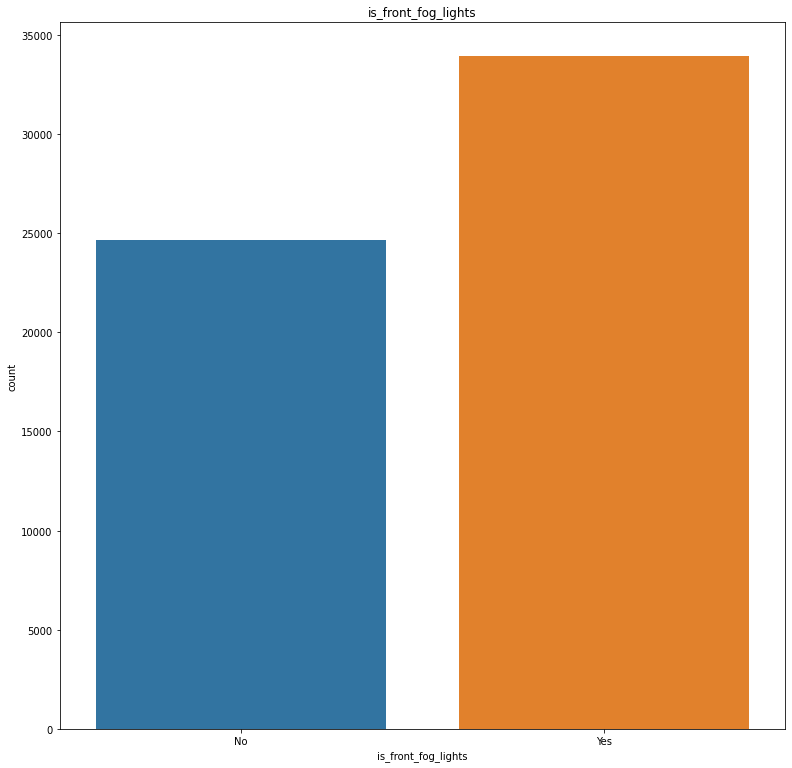

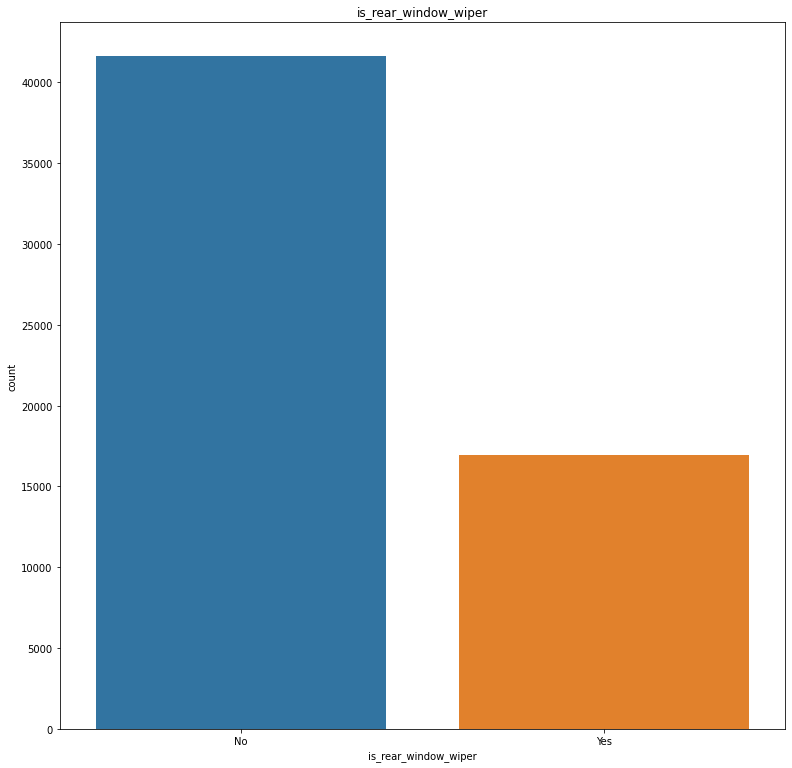

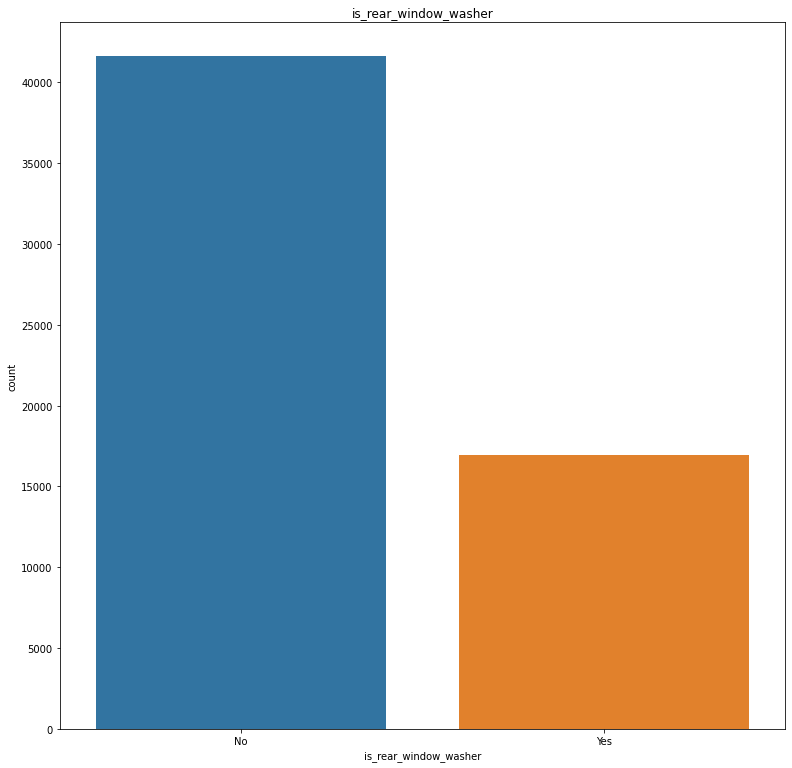

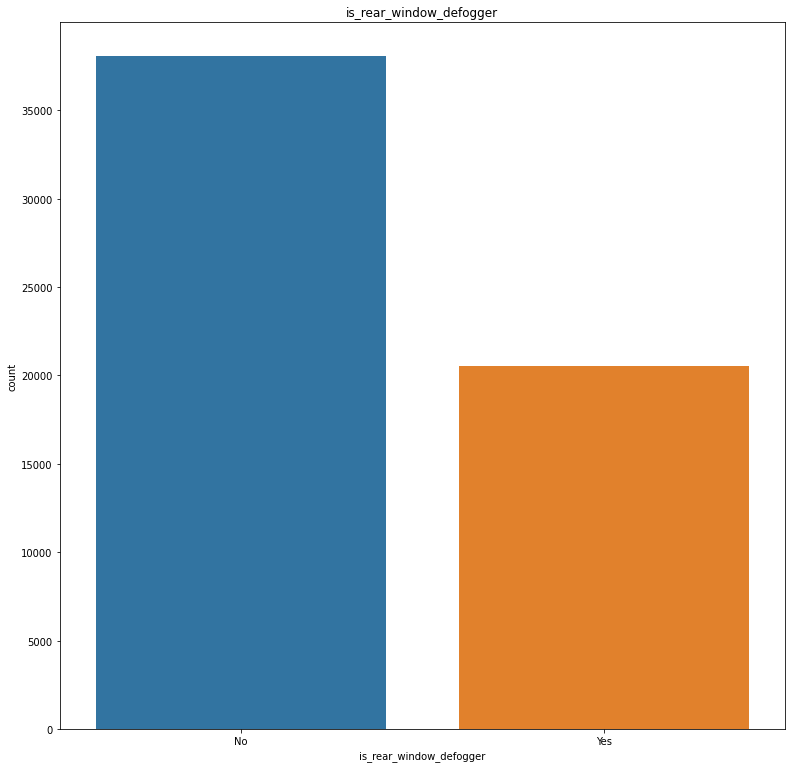

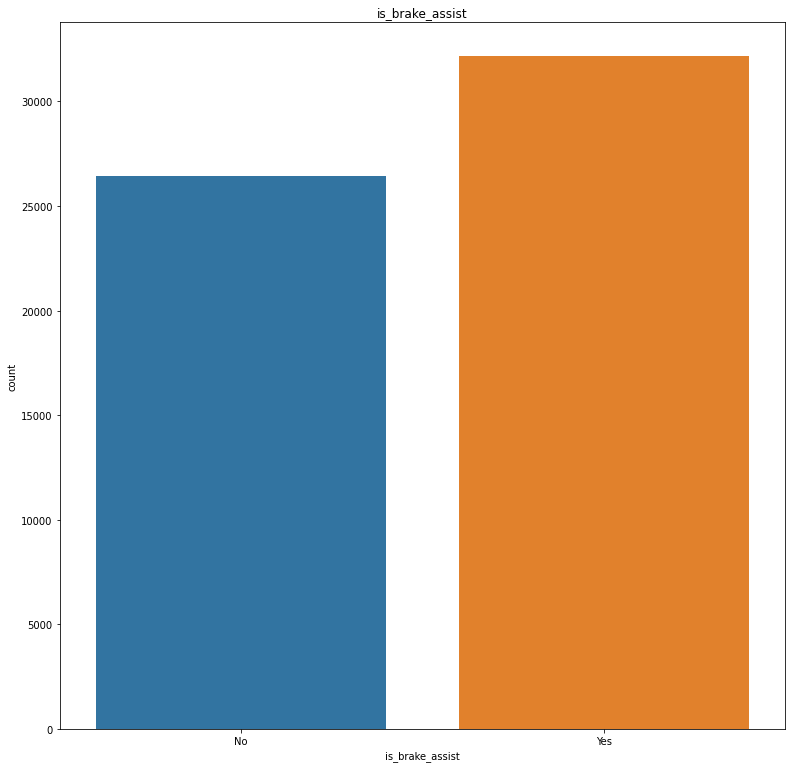

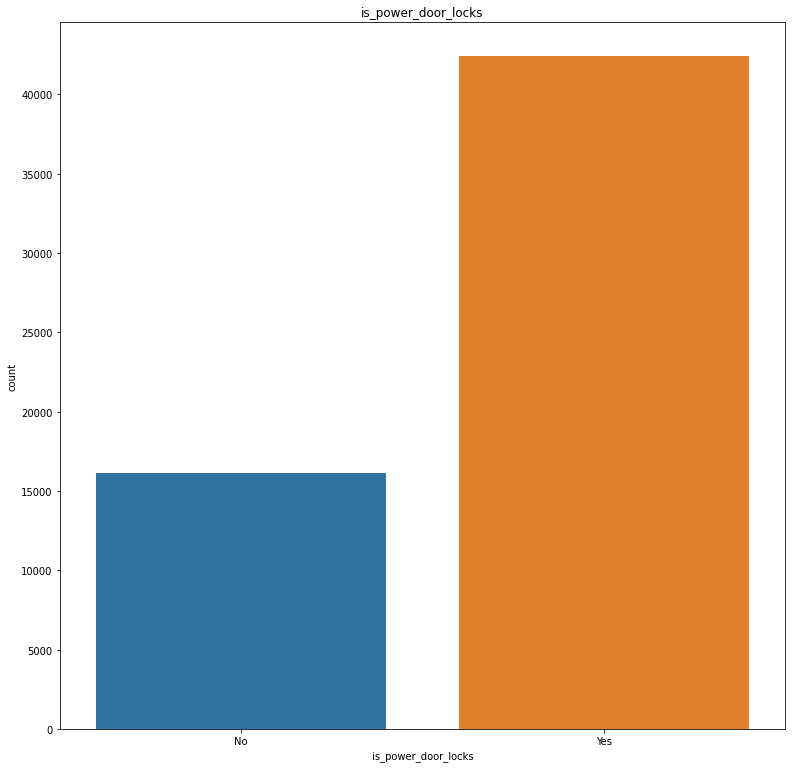

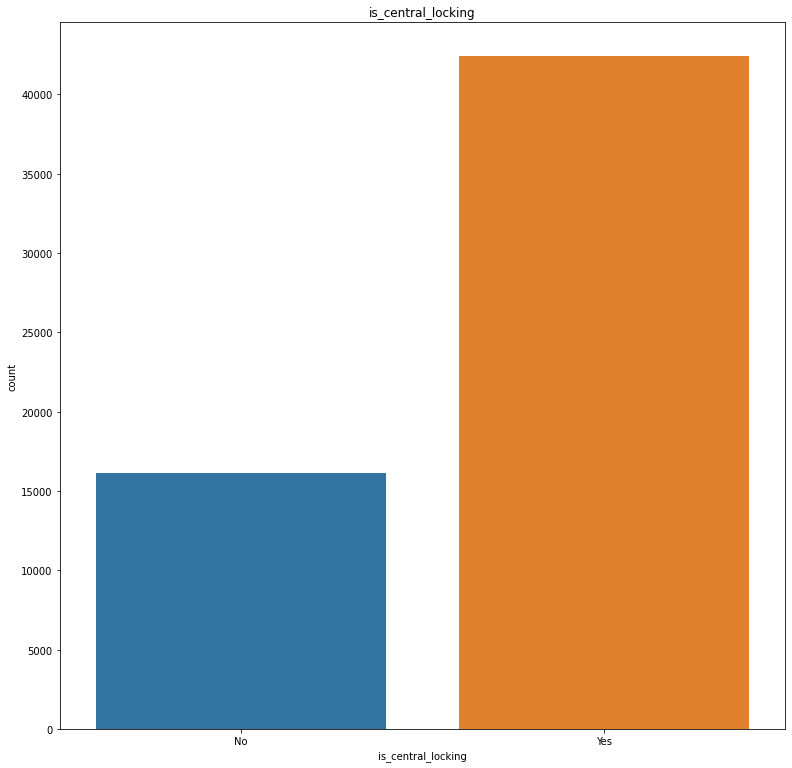

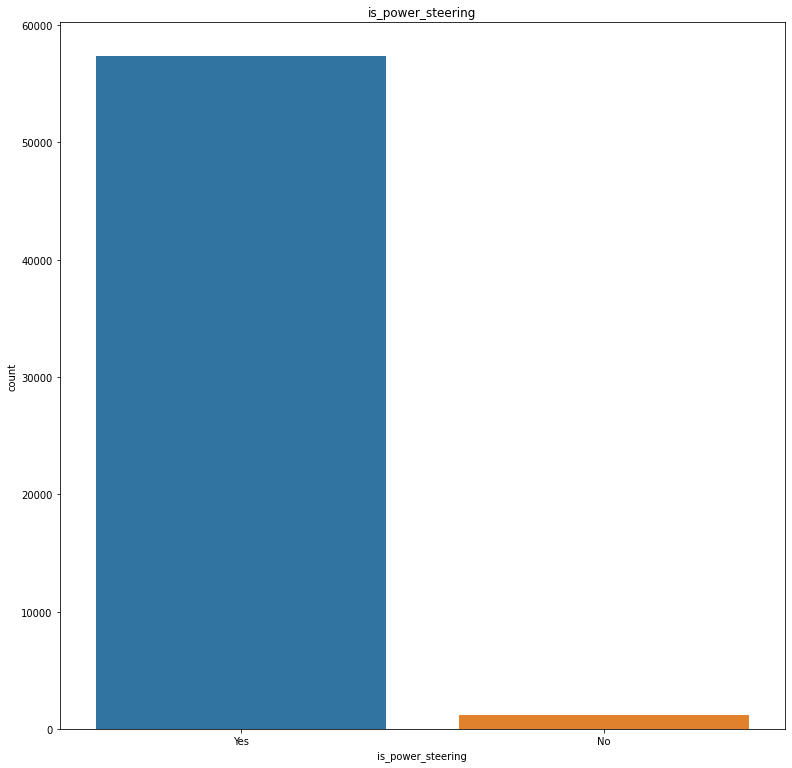

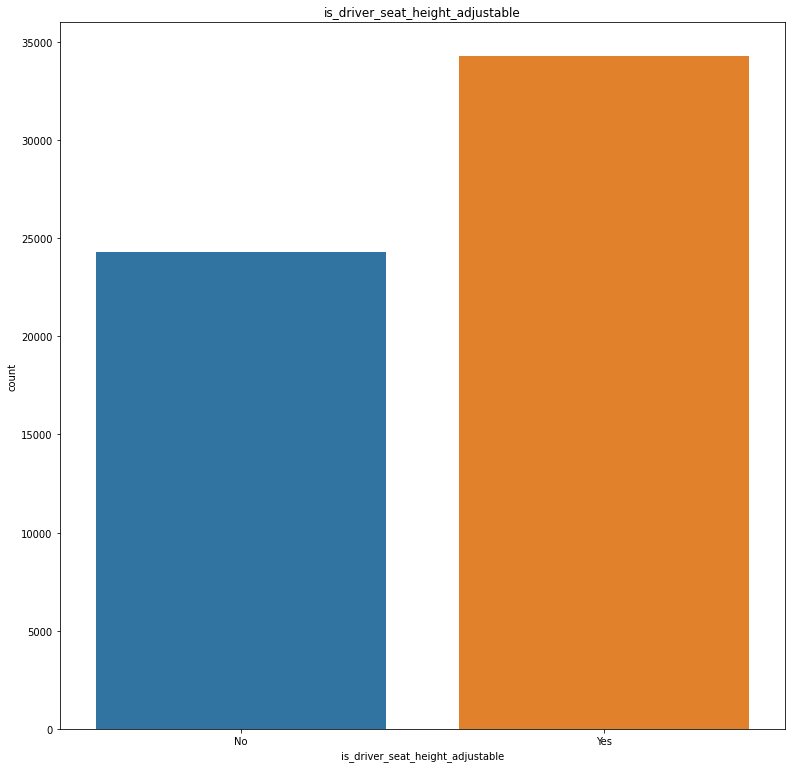

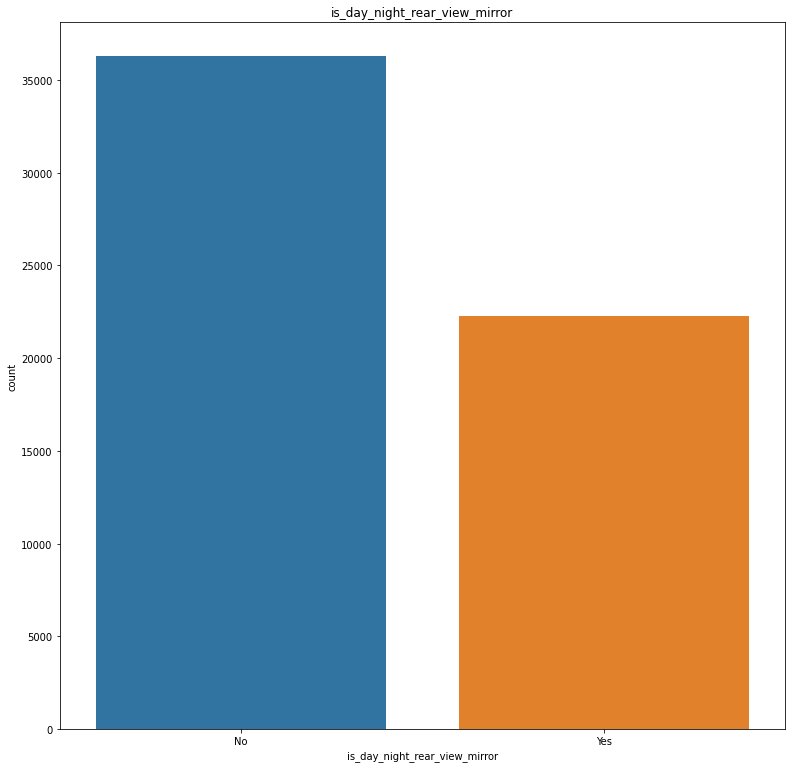

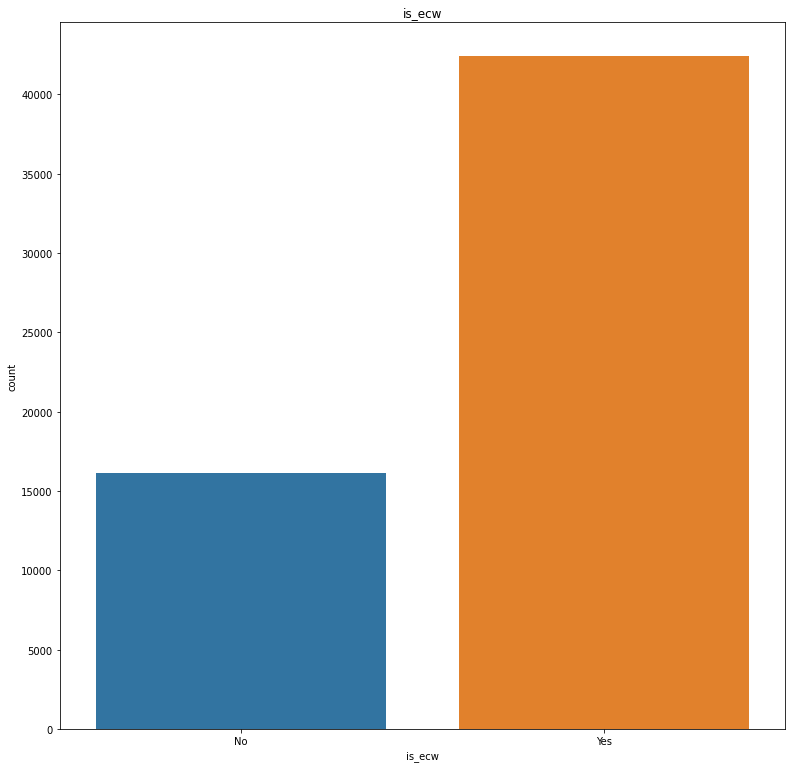

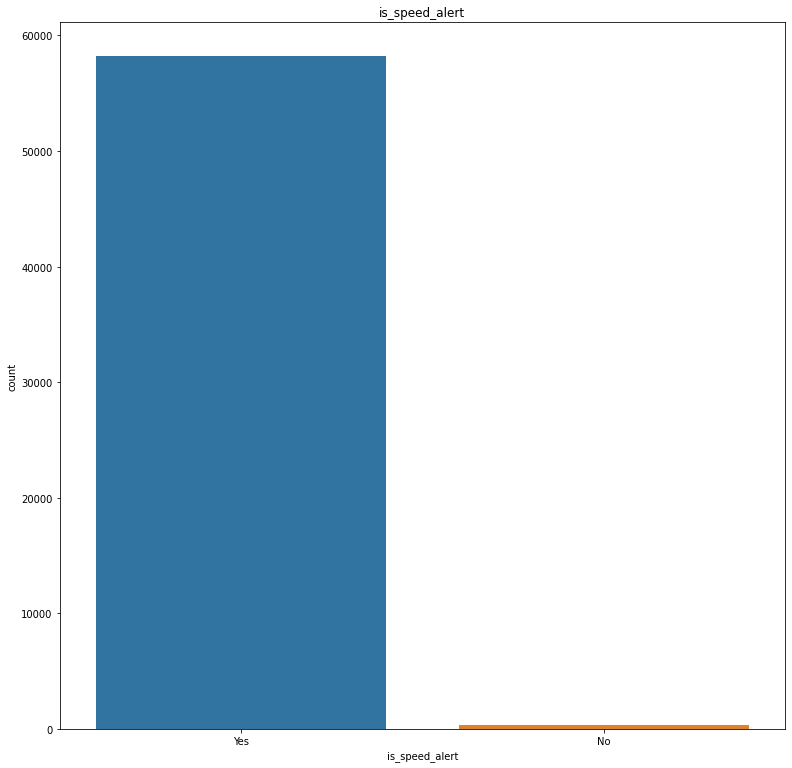

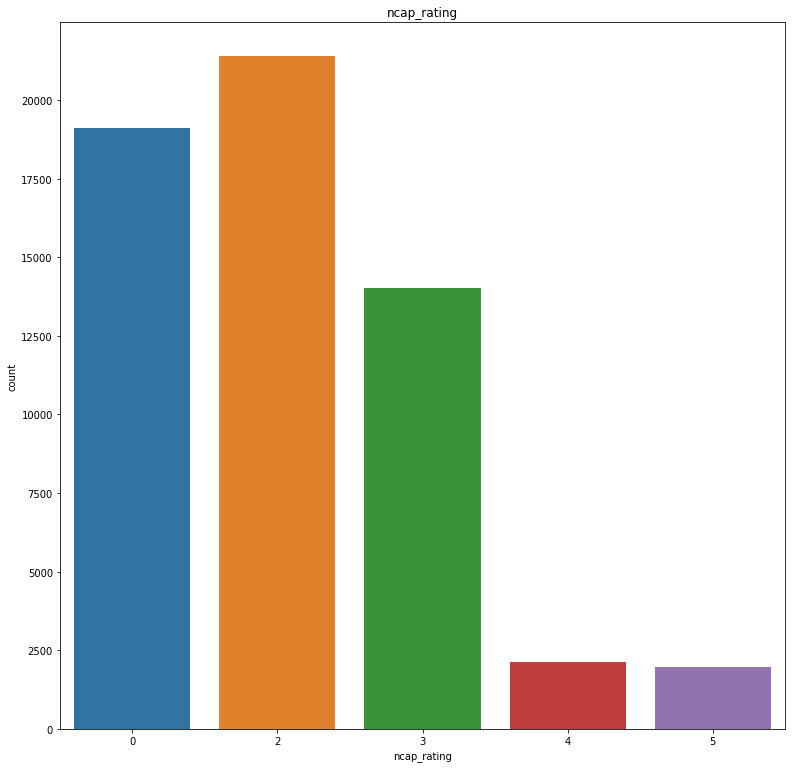

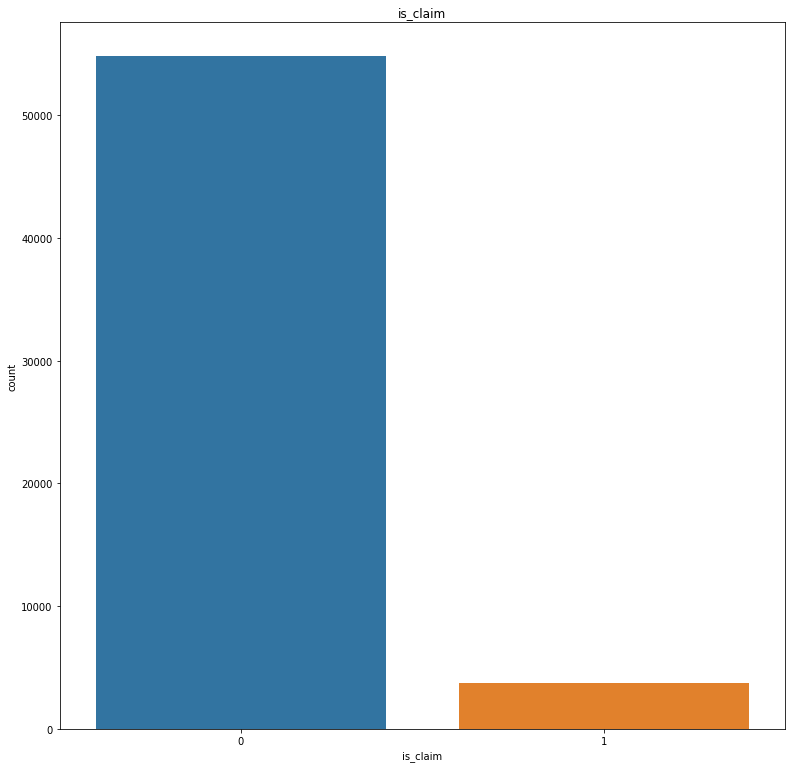

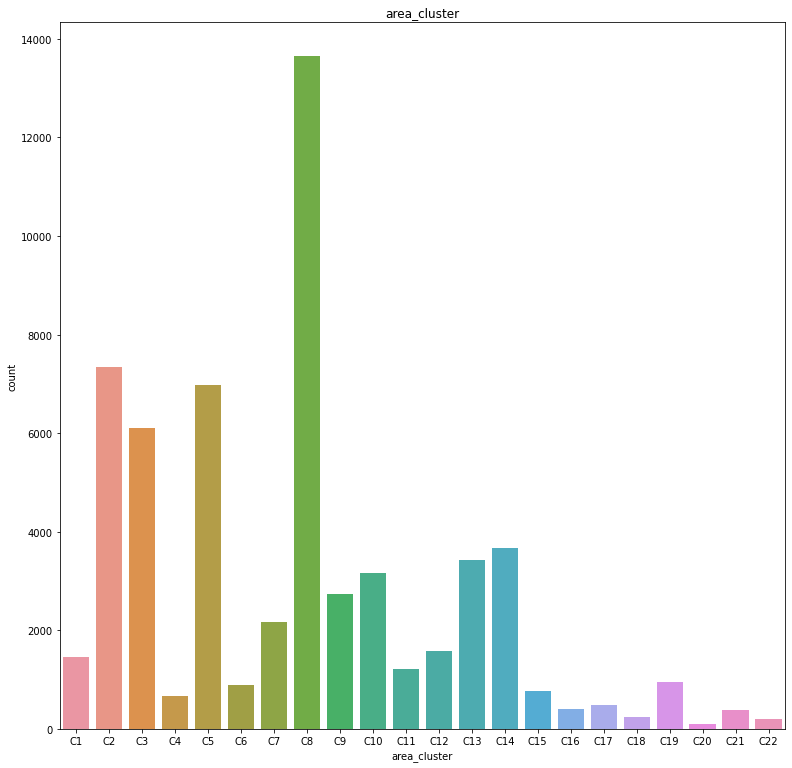

In [37]:
# categorical Analysis;

for i in cat_list:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)


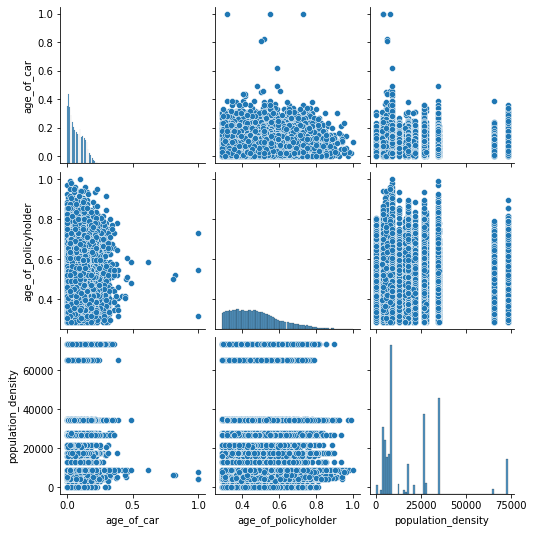

In [38]:
# numerical Analysis

sns.pairplot(df.loc[:,num_list]);


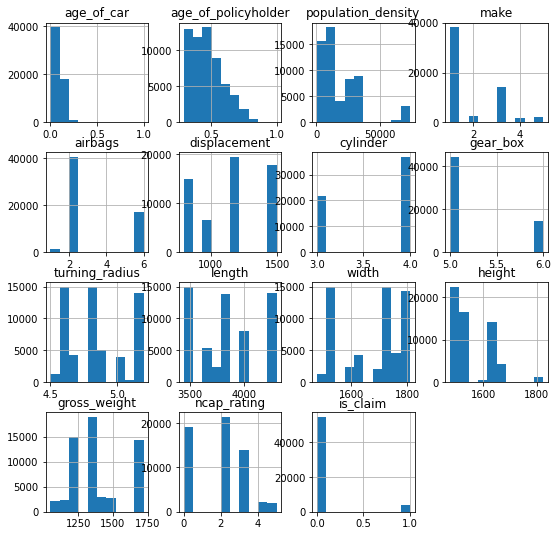

In [39]:
df.hist(figsize=(9,9));

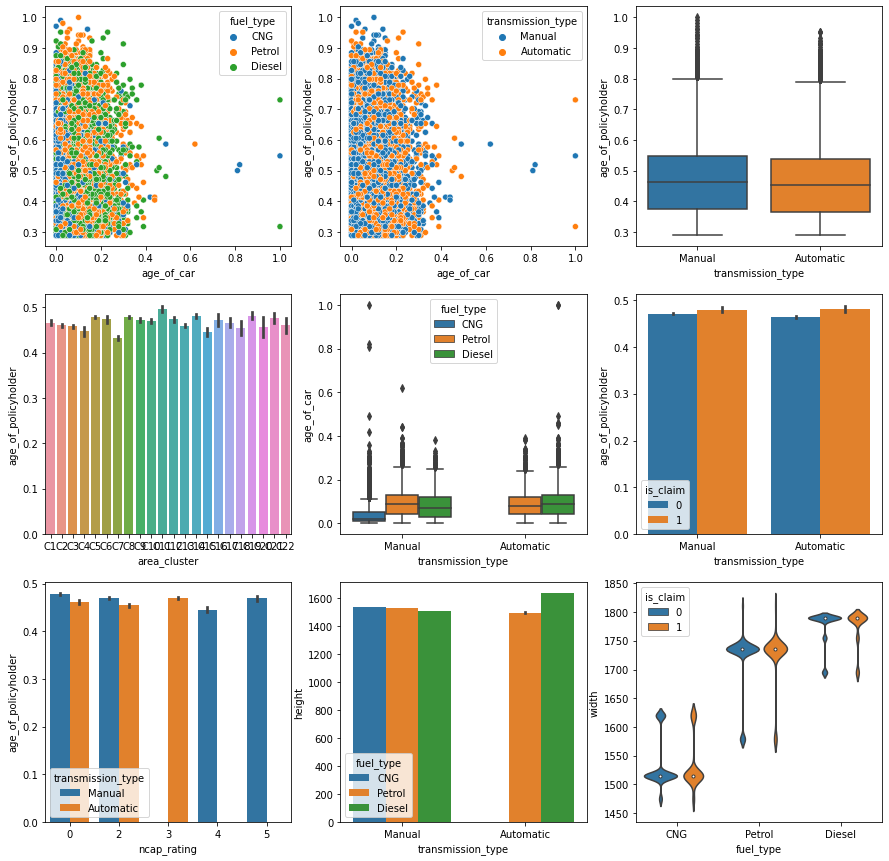

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age_of_car',y ='age_of_policyholder',hue="fuel_type",data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="age_of_car",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="transmission_type",y="age_of_policyholder",data=df)
plt.subplot(3,3,4)
sns.barplot(x="area_cluster",y="age_of_policyholder",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="transmission_type",y="age_of_car",hue="fuel_type",data=df)
plt.subplot(3,3,6)
sns.barplot(x="transmission_type",y="age_of_policyholder",hue="is_claim",data=df)
plt.subplot(3,3,7)
sns.barplot(x="ncap_rating",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,8)
sns.barplot(x="transmission_type",y="height",hue="fuel_type",data=df)
plt.subplot(3,3,9)
sns.violinplot(x="fuel_type",y="width",hue="is_claim",data=df)
plt.show()

### Encoding

In [23]:
df.nunique()

age_of_car                          49
age_of_policyholder                 75
area_cluster                        22
population_density                  22
make                                 5
segment                              6
model                               11
fuel_type                            3
max_torque                           9
max_power                            9
engine_type                         11
airbags                              3
is_esc                               2
is_adjustable_steering               2
is_tpms                              2
is_parking_sensors                   2
is_parking_camera                    2
rear_brakes_type                     2
displacement                         9
cylinder                             2
transmission_type                    2
gear_box                             2
steering_type                        3
turning_radius                       9
length                               9
width                    

In [42]:
df.select_dtypes("object")

area_cluster segment model fuel_type     max_torque          max_power  \
0               C1       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
1               C2       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
2               C3       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
3               C4      C1    M2    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   
4               C5       A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm   
...            ...     ...   ...       ...            ...                ...   
58587           C8       A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm   
58588          C14       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
58589           C5       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
58590           C8      B2    M6    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   
58591           C8      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   

              engine_type is_esc is_adjustable_steering is_tpms  ...  \
0       F8D Petrol Engine     No                     No      No  ...   
1       F8D Petrol Engine     No                     No      No  ...   
2       F8D Petrol Engine     No                     No      No  ...   
3      1.2 L K12N Dualjet    Yes                    Yes      No  ...   
4                 1.0 SCe     No                     No      No  ...   
...                   ...    ...                    ...     ...  ...   
58587             1.0 SCe     No                     No      No  ...   
58588   F8D Petrol Engine     No                     No      No  ...   
58589   F8D Petrol Engine     No                     No      No  ...   
58590   K Series Dual jet     No                    Yes      No  ...   
58591       1.5 L U2 CRDi    Yes                    Yes     Yes  ...   

      is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                        No                      No              No   
1                        No                      No              No   
2                        No                      No              No   
3                        No                     Yes             Yes   
4                        No                      No              No   
...                     ...                     ...             ...   
58587                    No                      No              No   
58588                    No                      No              No   
58589                    No                      No              No   
58590                    No                      No             Yes   
58591                   Yes                     Yes             Yes   

      is_power_door_locks is_central_locking is_power_steering  \
0                      No                 No               Yes   
1                      No                 No               Yes   
2                      No                 No               Yes   
3                     Yes                Yes               Yes   
4                     Yes                Yes               Yes   
...                   ...                ...               ...   
58587                 Yes                Yes               Yes   
58588                  No                 No               Yes   
58589                  No                 No               Yes   
58590                 Yes                Yes               Yes   
58591                 Yes                Yes               Yes   

      is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                   No                            No     No   
1                                   No                            No     No   
2                                   No                            No     No   
3                                  Yes                           Yes    Yes   
4                                   No                           Yes    Yes   
...                                ...                      

In [8]:
#label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df["max_torque"]=le.fit_transform(df["max_torque"])
df["max_power"]=le.fit_transform(df["max_power"])
df["engine_type"]=le.fit_transform(df["engine_type"])
df["area_cluster"]=le.fit_transform(df["area_cluster"])
df["model"]=le.fit_transform(df["model"])
df["engine_type"]=le.fit_transform(df["engine_type"])
df["transmission_type"]=le.fit_transform(df["transmission_type"])
df["segment"]=le.fit_transform(df["segment"])

In [12]:
#one hot encoding

In [13]:
dms=pd.get_dummies(df[["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert']])
dms


fuel_type_CNG  fuel_type_Diesel  fuel_type_Petrol  is_esc_No  \
0                  1                 0                 0          1   
1                  1                 0                 0          1   
2                  1                 0                 0          1   
3                  0                 0                 1          0   
4                  0                 0                 1          1   
...              ...               ...               ...        ...   
58587              0                 0                 1          1   
58588              1                 0                 0          1   
58589              1                 0                 0          1   
58590              0                 0                 1          1   
58591              0                 1                 0          0   

       is_esc_Yes  is_adjustable_steering_No  is_adjustable_steering_Yes  \
0               0                          1                           0   
1               0                          1                           0   
2               0                          1                           0   
3               1                          0                           1   
4               0                          1                           0   
...           ...                        ...                         ...   
58587           0                          1                           0   
58588           0                          1                           0   
58589           0                          1                           0   
58590           0                          0                           1   
58591           1                          0                           1   

       is_tpms_No  is_tpms_Yes  is_parking_sensors_No  ...  \
0               1            0                      0  ...   
1               1            0                      0  ...   
2               1            0                      0  ...   
3               1            0                      0  ...   
4               1            0                      1  ...   
...           ...          ...                    ...  ...   
58587           1            0                      1  ...   
58588           1            0                      0  ...   
58589           1            0                      0  ...   
58590           1            0                      0  ...   
58591           0            1                      0  ...   

       is_power_steering_No  is_power_steering_Yes  \
0                         0                      1   
1                         0                      1   
2                         0                      1   
3                         0                      1   
4                         0                      1   
...                     ...                    ...   
58587                     0                      1   
58588                     0                      1   
58589                     0                      1   
58590                     0                      1   
58591                     0                      1   

       is_driver_seat_height_adjustable_No  \
0                                        1   
1                                        1   
2                                        1   
3                                        0   
4                                        1   
...                                    ...   
58587                                    1   
58588                                    1   
58589                                    1   
58590                                    0   
58591                                    0   

       is_driver_seat_height_adjustable_Yes  is_day_night_rear_view_mirror_No  \
0                                         0                                 1   
1                                         0                                 1   
2                                         0        

In [14]:
df.drop(["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert'],axis=1,inplace=True)

In [15]:
df=pd.concat([df,dms],axis=1)
df.head()

age_of_car  age_of_policyholder  area_cluster  population_density  make  \
0        0.05             0.644231             0                4990     1   
1        0.02             0.375000            11               27003     1   
2        0.02             0.384615            15                4076     1   
3        0.11             0.432692            16               21622     1   
4        0.11             0.634615            17               34738     2   

   segment  model  max_torque  max_power  engine_type  ...  \
0        0      0           5          2            6  ...   
1        0      0           5          2            6  ...   
2        0      0           5          2            6  ...   
3        3      3           0          6            2  ...   
4        0      4           8          5            0  ...   

   is_power_steering_No  is_power_steering_Yes  \
0                     0                      1   
1                     0                      1   
2                     0                      1   
3                     0                      1   
4                     0                      1   

   is_driver_seat_height_adjustable_No  is_driver_seat_height_adjustable_Yes  \
0                                    1                                     0   
1                                    1                                     0   
2                                    1                                     0   
3                                    0                                     1   
4                                    1                                     0   

   is_day_night_rear_view_mirror_No  is_day_night_rear_view_mirror_Yes  \
0                                 1                                  0   
1                                 1                                  0   
2                                 1                                  0   
3                                 0                                  1   
4                                 0                                  1   

   is_ecw_No  is_ecw_Yes  is_speed_alert_No  is_speed_alert_Yes  
0          1           0                  0                   1  
1          1           0                  0                   1  
2          1           0                  0                   1  
3          0           1                  0                   1  
4          0           1                  0                   1  

[5 rows x 64 columns]

### Corelation Analysis

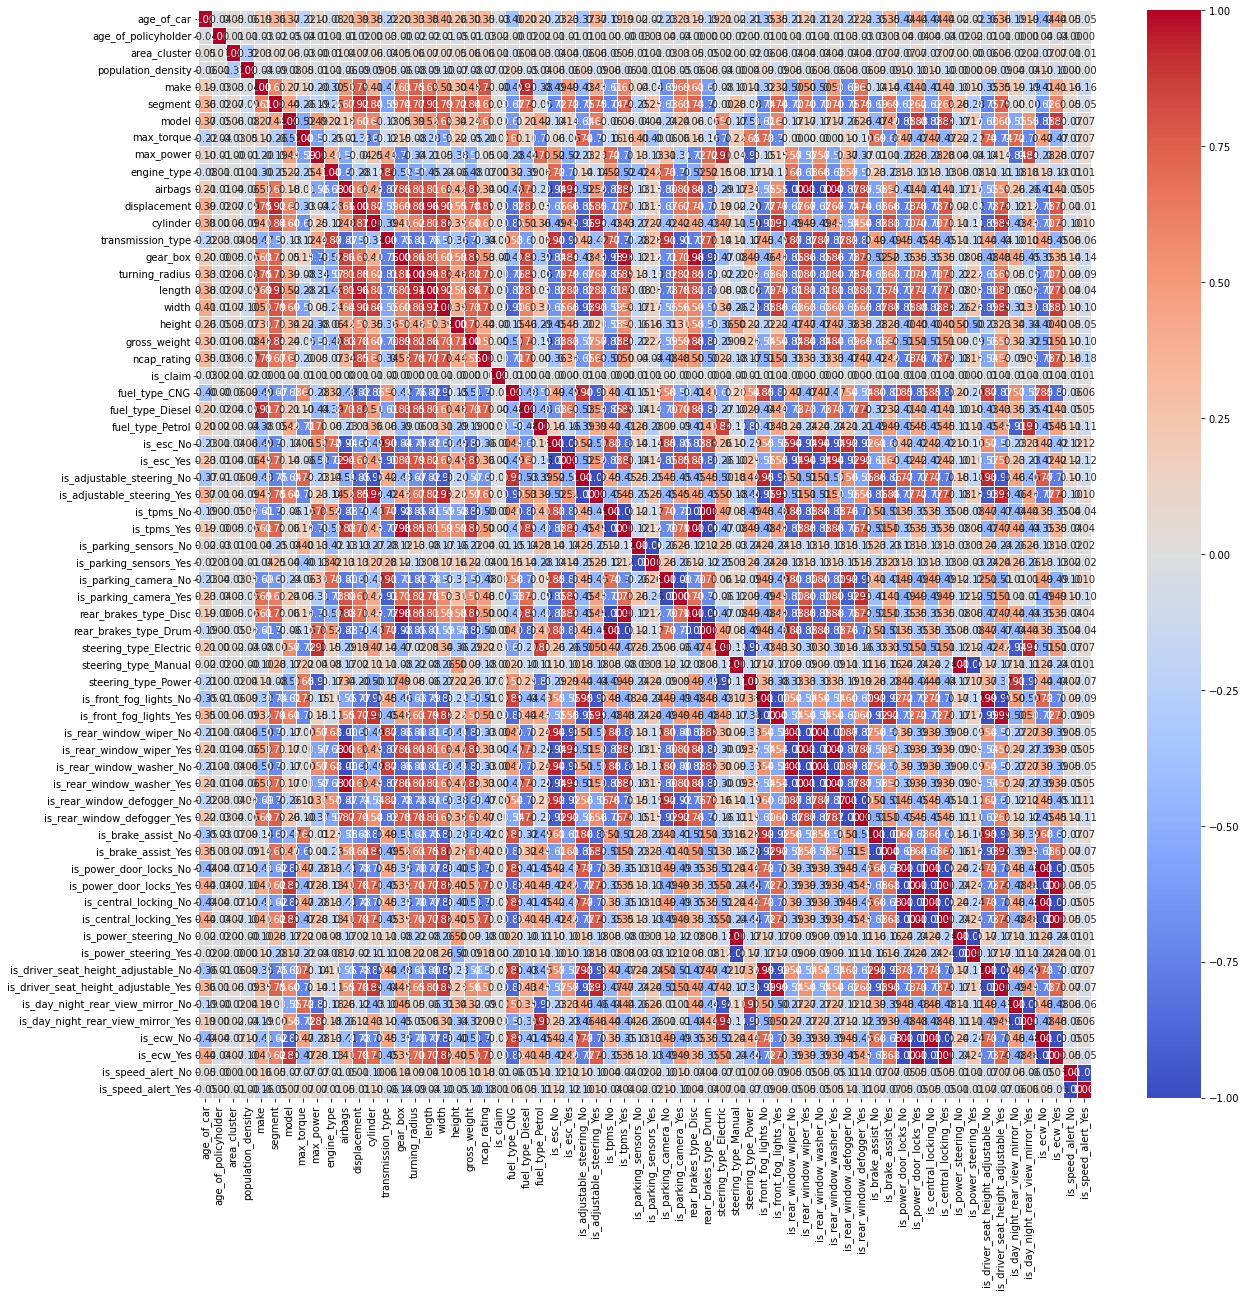

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [67]:
cor=df.corr(method="pearson")

In [68]:
high_cor=abs(cor[cor>=0.9])
high_cor[high_cor<=1.0].stack().to_string()

'age_of_car                            age_of_car                              1.000000\nage_of_policyholder                   age_of_policyholder                     1.000000\narea_cluster                          area_cluster                            1.000000\npopulation_density                    population_density                      1.000000\nmake                                  make                                    1.000000\n                                      fuel_type_Diesel                        0.906613\nsegment                               segment                                 1.000000\n                                      displacement                            0.923338\n                                      length                                  0.909084\nmodel                                 model                                   1.000000\nmax_torque                            max_torque                              1.000000\nmax_power                      

In [69]:
# discard the highly correlated attributes
# yüksek korelasyonlu olan öznitelikleri atalım

In [16]:
df.drop(["is_speed_alert_Yes","is_ecw_Yes","is_day_night_rear_view_mirror_Yes",
        "is_driver_seat_height_adjustable_No","is_power_steering_No",
         "is_central_locking_Yes","is_power_door_locks_Yes","is_brake_assist_Yes",
        "is_rear_window_defogger_Yes","is_rear_window_washer_Yes","is_front_fog_lights_Yes",
        "rear_brakes_type_Disc","is_parking_camera_No","is_parking_sensors_No",
        "is_tpms_Yes","is_adjustable_steering_Yes","is_esc_No"],axis=1,
       inplace=True)



In [71]:
# we removed some attributes, now let's observe again

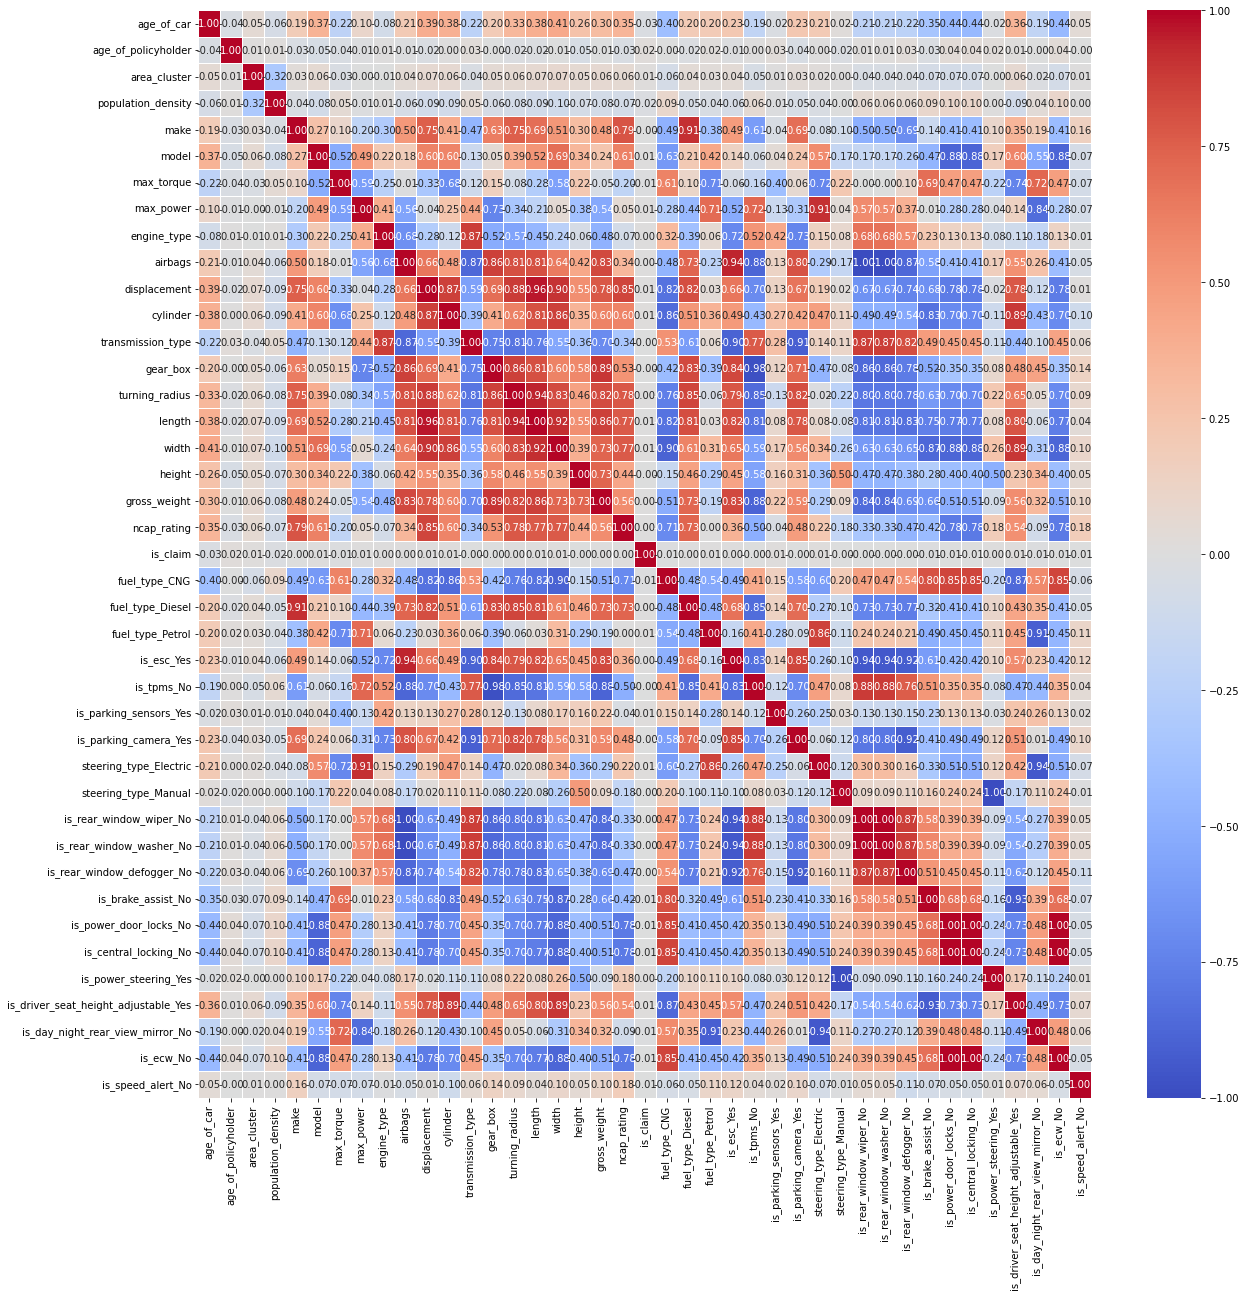

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [72]:
# very highly correlated features still exist, let's continue

In [73]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


column  Correlation with is_claim
0                               is_claim                   1.000000
1                    age_of_policyholder                   0.022435
2                               cylinder                   0.013434
3   is_driver_seat_height_adjustable_Yes                   0.010686
4                                  width                   0.009947
5                 steering_type_Electric                   0.009849
6                           area_cluster                   0.009425
7                 is_parking_sensors_Yes                   0.008419
8                           displacement                   0.007678
9                              max_power                   0.007573
10                      fuel_type_Petrol                   0.007253
11                                 model                   0.006548
12                                length                   0.006495
13                               segment                   0.006366
14                          gross_weight                   0.003894
15                           ncap_rating                   0.003800
16                            is_esc_Yes                   0.002995
17                               airbags                   0.002789
18                        turning_radius                   0.002724
19              is_rear_window_wiper_Yes                   0.002651
20                      fuel_type_Diesel                   0.002407
21                 is_power_steering_Yes                   0.002128
22                           engine_type                   0.000927
23                                  make                  -0.000456
24                              gear_box                  -0.000635
25                     transmission_type                  -0.000637
26                            is_tpms_No                  -0.000703
27                 rear_brakes_type_Drum                  -0.000703
28                 is_parking_camera_Yes                  -0.000871
29                                height                  -0.002024
30                  steering_type_Manual                  -0.002128
31            is_rear_window_defogger_No                  -0.002588
32              is_rear_window_washer_No                  -0.002651
33               is_rear_window_wiper_No                  -0.002651
34                 is_central_locking_No                  -0.006637
35                             is_ecw_No                  -0.006637
36                is_power_door_locks_No                  -0.006637
37                     is_speed_alert_No                  -0.007307
38      is_day_night_rear_view_mirror_No                  -0.007989
39                   steering_type_Power                  -0.009169
40                         fuel_type_CNG                  -0.009592
41                    is_brake_assist_No                  -0.010893
42                is_front_fog_lights_No                  -0.011825
43             is_adjustable_steering_No                  -0.013917
44                            max_torque                  -0.014390
45                    population_density                  -0.017808
46                            age_of_car                  -0.028172

In [17]:
df.drop(["is_rear_window_wiper_Yes","segment","rear_brakes_type_Drum",
        "is_adjustable_steering_No","is_rear_window_wiper_Yes",
        "is_front_fog_lights_No","steering_type_Power"],axis=1,
       inplace=True)


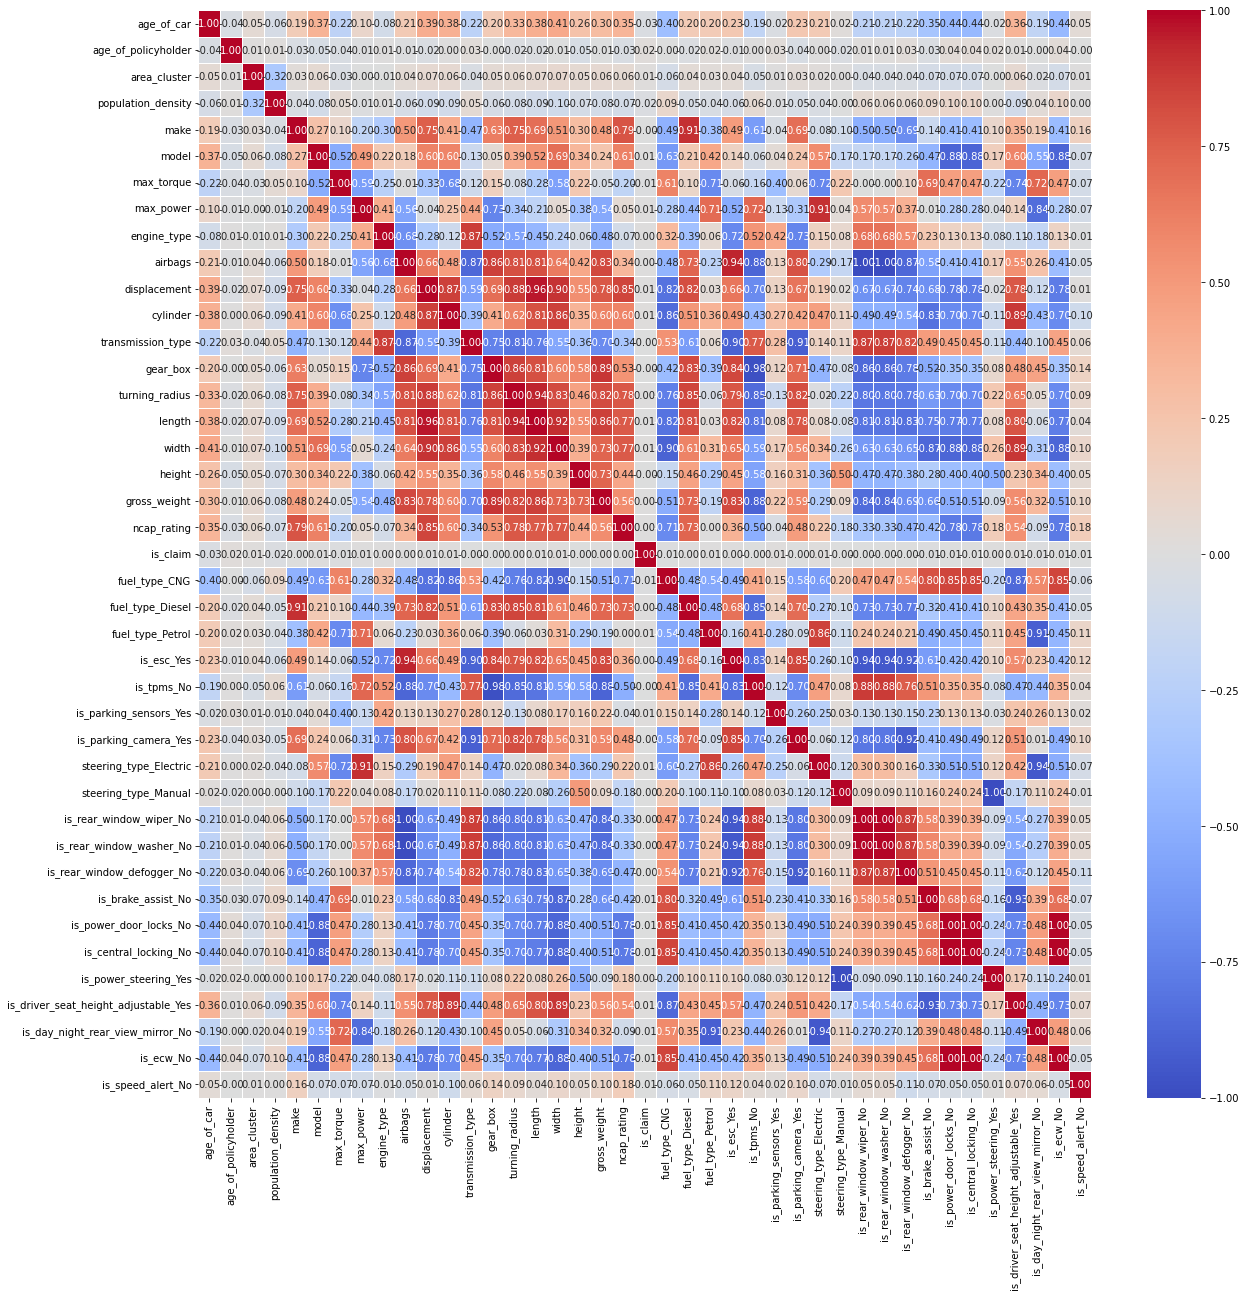

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [73]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


column  Correlation with is_claim
0                               is_claim                   1.000000
1                    age_of_policyholder                   0.022435
2                               cylinder                   0.013434
3   is_driver_seat_height_adjustable_Yes                   0.010686
4                                  width                   0.009947
5                 steering_type_Electric                   0.009849
6                           area_cluster                   0.009425
7                 is_parking_sensors_Yes                   0.008419
8                           displacement                   0.007678
9                              max_power                   0.007573
10                      fuel_type_Petrol                   0.007253
11                                 model                   0.006548
12                                length                   0.006495
13                          gross_weight                   0.003894
14                           ncap_rating                   0.003800
15                            is_esc_Yes                   0.002995
16                               airbags                   0.002789
17                        turning_radius                   0.002724
18                      fuel_type_Diesel                   0.002407
19                 is_power_steering_Yes                   0.002128
20                           engine_type                   0.000927
21                                  make                  -0.000456
22                              gear_box                  -0.000635
23                     transmission_type                  -0.000637
24                            is_tpms_No                  -0.000703
25                 is_parking_camera_Yes                  -0.000871
26                                height                  -0.002024
27                  steering_type_Manual                  -0.002128
28            is_rear_window_defogger_No                  -0.002588
29               is_rear_window_wiper_No                  -0.002651
30              is_rear_window_washer_No                  -0.002651
31                is_power_door_locks_No                  -0.006637
32                             is_ecw_No                  -0.006637
33                 is_central_locking_No                  -0.006637
34                     is_speed_alert_No                  -0.007307
35      is_day_night_rear_view_mirror_No                  -0.007989
36                         fuel_type_CNG                  -0.009592
37                    is_brake_assist_No                  -0.010893
38                            max_torque                  -0.014390
39                    population_density                  -0.017808
40                            age_of_car                  -0.028172

In [72]:
# finally let's extract a few more attributes and observe

In [19]:
df.drop(["length","is_ecw_No","is_central_locking_No","airbags",
        "make","max_power","transmission_type","transmission_type",
        "gear_box","fuel_type_Diesel","is_power_door_locks_No",
        "is_rear_window_washer_No","is_rear_window_washer_No",
        "steering_type_Manual","is_day_night_rear_view_mirror_No",
        ],axis=1,inplace=True)

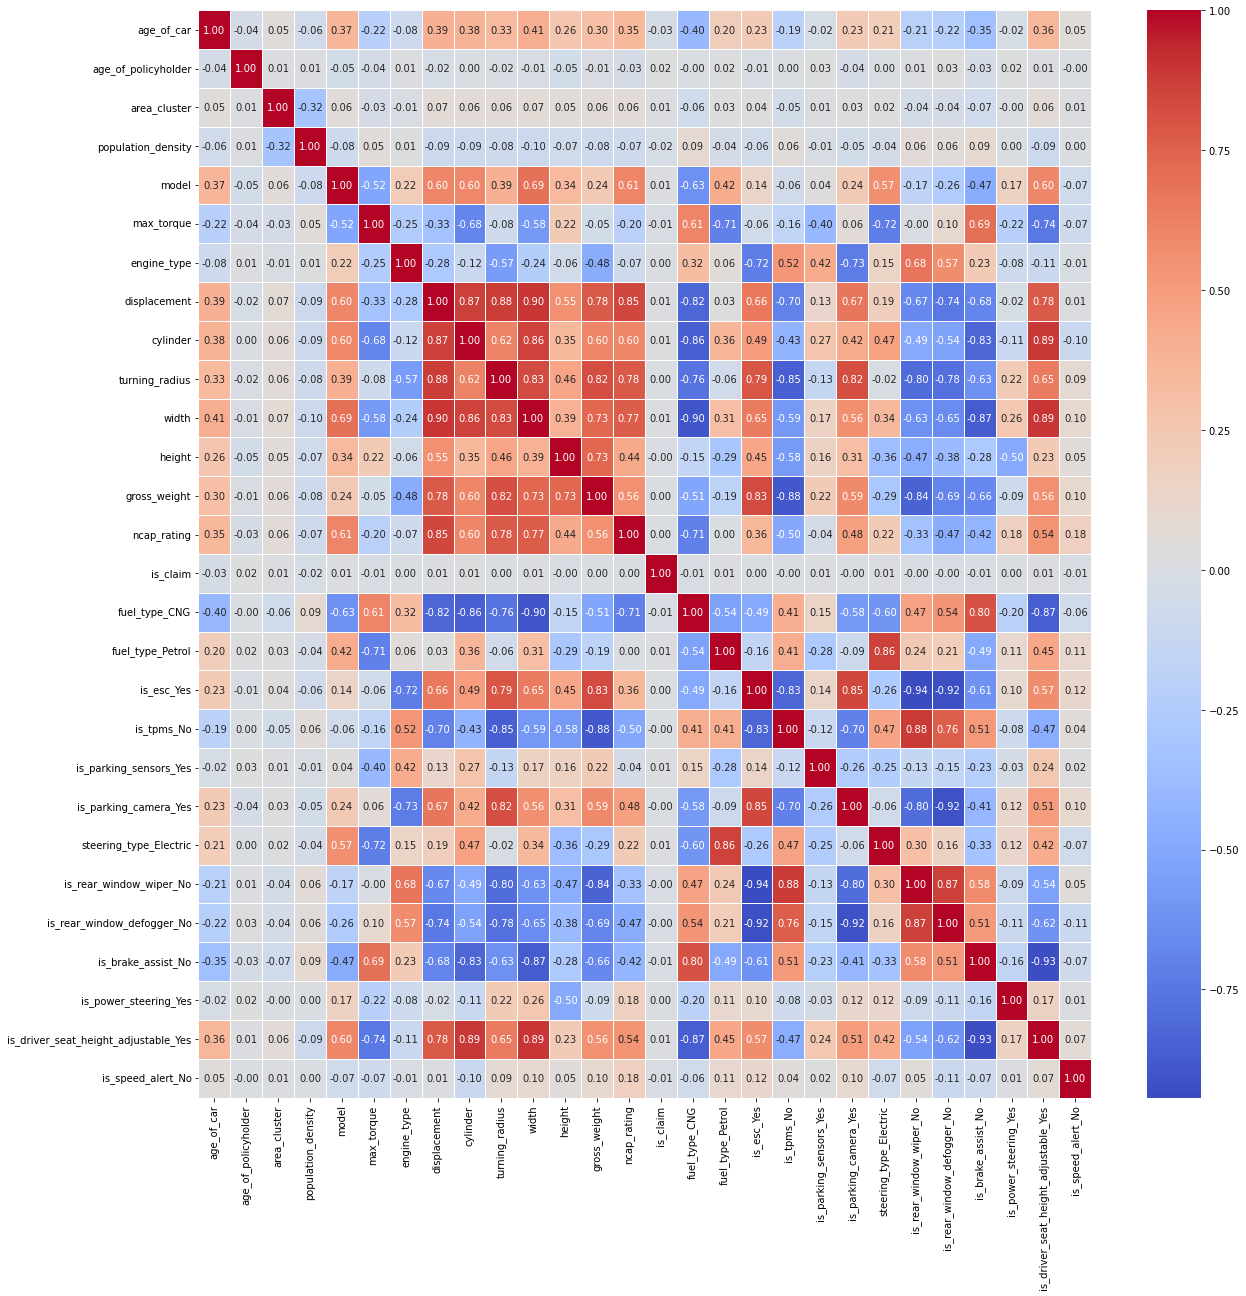

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [76]:
df.head()

age_of_car  age_of_policyholder  area_cluster  population_density  model  \
0        0.05             0.644231             0                4990      0   
1        0.02             0.375000            11               27003      0   
2        0.02             0.384615            15                4076      0   
3        0.11             0.432692            16               21622      3   
4        0.11             0.634615            17               34738      4   

   max_torque  engine_type  displacement  cylinder  turning_radius  ...  \
0           5            6           796         3             4.6  ...   
1           5            6           796         3             4.6  ...   
2           5            6           796         3             4.6  ...   
3           0            2          1197         4             4.8  ...   
4           8            0           999         3             5.0  ...   

   is_tpms_No  is_parking_sensors_Yes  is_parking_camera_Yes  \
0           1                       1                      0   
1           1                       1                      0   
2           1                       1                      0   
3           1                       1                      1   
4           1                       0                      1   

   steering_type_Electric  is_rear_window_wiper_No  \
0                       0                        1   
1                       0                        1   
2                       0                        1   
3                       1                        1   
4                       1                        1   

   is_rear_window_defogger_No  is_brake_assist_No  is_power_steering_Yes  \
0                           1                   1                      1   
1                           1                   1                      1   
2                           1                   1                      1   
3                           0                   0                      1   
4                           1                   1                      1   

   is_driver_seat_height_adjustable_Yes  is_speed_alert_No  
0                                     0                  0  
1                                     0                  0  
2                                     0                  0  
3                                     1                  0  
4                                     0                  0  

[5 rows x 28 columns]

In [77]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


column  Correlation with is_claim
0                               is_claim                   1.000000
1                    age_of_policyholder                   0.022435
2                               cylinder                   0.013434
3   is_driver_seat_height_adjustable_Yes                   0.010686
4                                  width                   0.009947
5                 steering_type_Electric                   0.009849
6                           area_cluster                   0.009425
7                 is_parking_sensors_Yes                   0.008419
8                           displacement                   0.007678
9                       fuel_type_Petrol                   0.007253
10                                 model                   0.006548
11                          gross_weight                   0.003894
12                           ncap_rating                   0.003800
13                            is_esc_Yes                   0.002995
14                        turning_radius                   0.002724
15                 is_power_steering_Yes                   0.002128
16                           engine_type                   0.000927
17                            is_tpms_No                  -0.000703
18                 is_parking_camera_Yes                  -0.000871
19                                height                  -0.002024
20            is_rear_window_defogger_No                  -0.002588
21               is_rear_window_wiper_No                  -0.002651
22                     is_speed_alert_No                  -0.007307
23                         fuel_type_CNG                  -0.009592
24                    is_brake_assist_No                  -0.010893
25                            max_torque                  -0.014390
26                    population_density                  -0.017808
27                            age_of_car                  -0.028172

In [78]:
# we didn't completely remove the high relativities, let's throw in a few more

In [21]:
df.drop(["displacement","fuel_type_CNG","is_brake_assist_No",
        "is_rear_window_wiper_No","is_rear_window_defogger_No",
        ],axis=1,inplace=True)

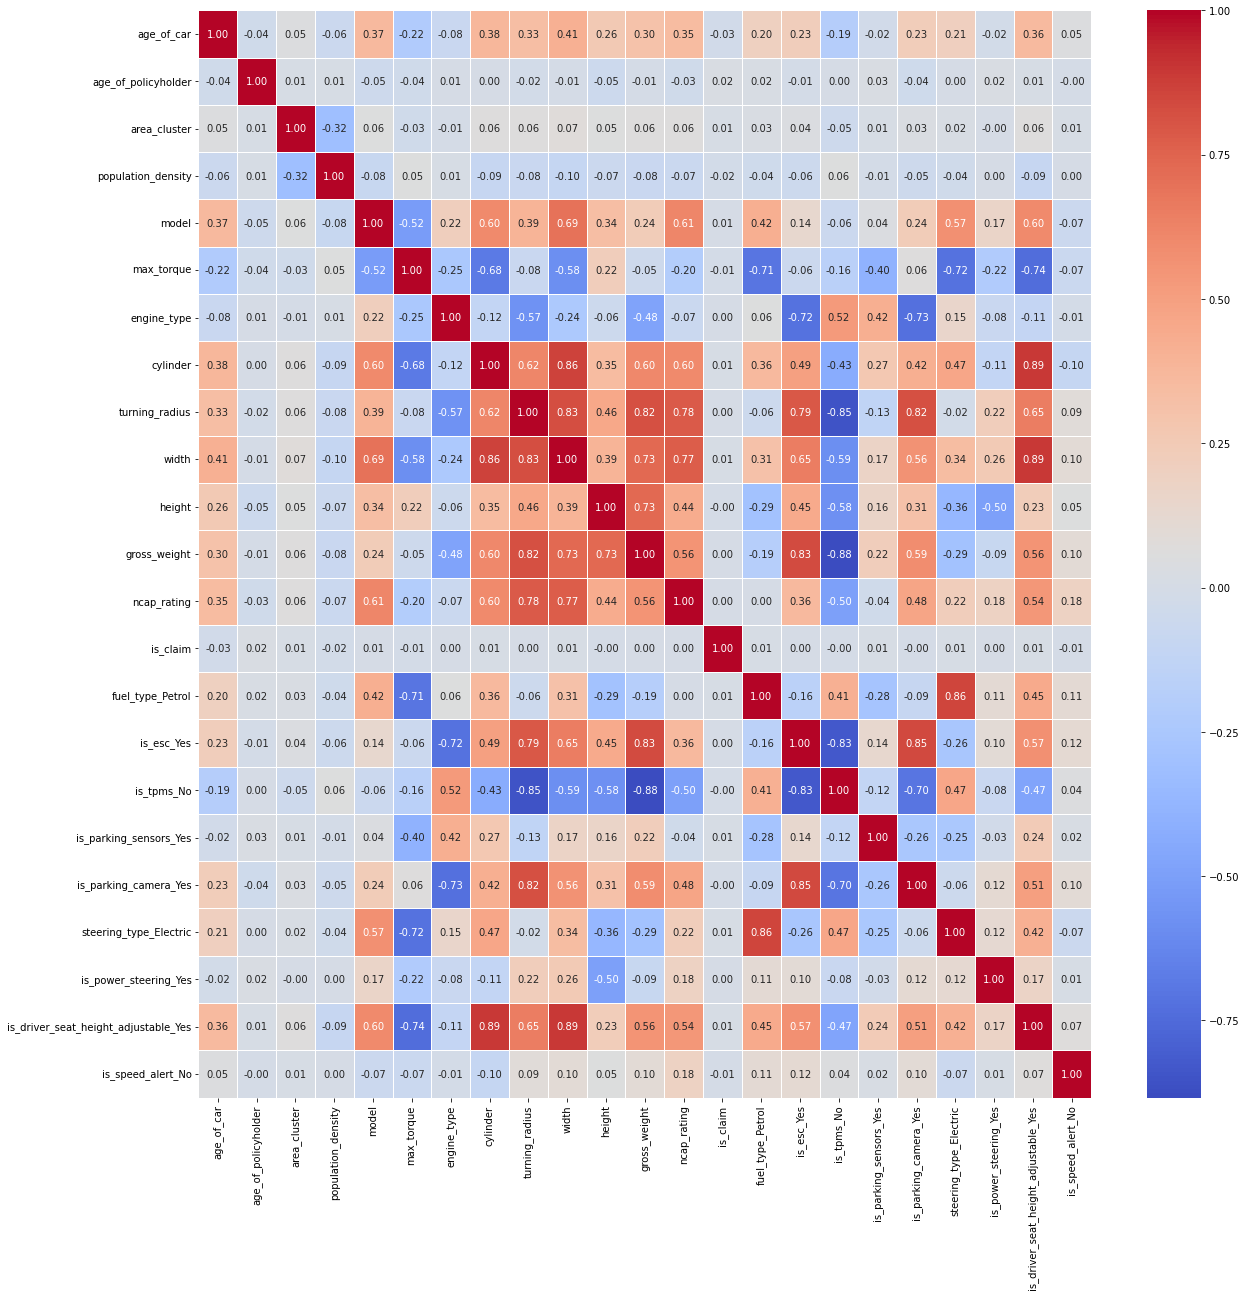

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [81]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


column  Correlation with is_claim
0                               is_claim                   1.000000
1                    age_of_policyholder                   0.022435
2                               cylinder                   0.013434
3   is_driver_seat_height_adjustable_Yes                   0.010686
4                                  width                   0.009947
5                 steering_type_Electric                   0.009849
6                           area_cluster                   0.009425
7                 is_parking_sensors_Yes                   0.008419
8                       fuel_type_Petrol                   0.007253
9                                  model                   0.006548
10                          gross_weight                   0.003894
11                           ncap_rating                   0.003800
12                            is_esc_Yes                   0.002995
13                        turning_radius                   0.002724
14                 is_power_steering_Yes                   0.002128
15                           engine_type                   0.000927
16                            is_tpms_No                  -0.000703
17                 is_parking_camera_Yes                  -0.000871
18                                height                  -0.002024
19                     is_speed_alert_No                  -0.007307
20                            max_torque                  -0.014390
21                    population_density                  -0.017808
22                            age_of_car                  -0.028172

*  we have done the necessary correlation operations, now the table is more convincing, we can move on to the modeling part


In [84]:
df.describe().T

count          mean           std  \
age_of_car                            58592.0      0.069424      0.056721   
age_of_policyholder                   58592.0      0.469420      0.122886   
area_cluster                          58592.0     13.035653      6.803915   
population_density                    58592.0  18826.858667  17660.174792   
model                                 58592.0      4.659237      3.197355   
max_torque                            58592.0      3.288538      2.440212   
engine_type                           58592.0      5.502748      2.684796   
cylinder                              58592.0      3.626963      0.483616   
turning_radius                        58592.0      4.852893      0.228061   
width                                 58592.0   1672.233667    112.089135   
height                                58592.0   1553.335370     79.622270   
gross_weight                          58592.0   1385.276813    212.423085   
ncap_rating                           58592.0      1.759950      1.389576   
is_claim                              58592.0      0.063968      0.244698   
fuel_type_Petrol                      58592.0      0.350423      0.477107   
is_esc_Yes                            58592.0      0.314053      0.464142   
is_tpms_No                            58592.0      0.760752      0.426628   
is_parking_sensors_Yes                58592.0      0.959500      0.197131   
is_parking_camera_Yes                 58592.0      0.390634      0.487897   
steering_type_Electric                58592.0      0.407581      0.491389   
is_power_steering_Yes                 58592.0      0.979366      0.142158   
is_driver_seat_height_adjustable_Yes  58592.0      0.585251      0.492683   
is_speed_alert_No                     58592.0      0.006195      0.078467   

                                              min          25%          50%  \
age_of_car                               0.000000     0.020000     0.060000   
age_of_policyholder                      0.288462     0.365385     0.451923   
area_cluster                             0.000000     6.000000    15.000000   
population_density                     290.000000  6112.000000  8794.000000   
model                                    0.000000     0.000000     5.000000   
max_torque                               0.000000     0.000000     4.000000   
engine_type                              0.000000     3.000000     6.000000   
cylinder                                 3.000000     3.000000     4.000000   
turning_radius                           4.500000     4.600000     4.800000   
width                                 1475.000000  1515.000000  1735.000000   
height                                1475.000000  1475.000000  1530.000000   
gross_weight                          1051.000000  1185.000000  1335.000000   
ncap_rating                              0.000000     0.000000     2.000000   
is_claim                                 0.000000     0.000000     0.000000   
fuel_type_Petrol                         0.000000     0.000000     0.000000   
is_esc_Yes                               0.000000     0.000000     0.000000   
is_tpms_No                               0.000000     1.000000     1.000000   
is_parking_sensors_Yes                   0.000000     1.000000     1.000000   
is_parking_camera_Yes                    0.000000     0.000000     0.000000   
steering_type_Electric                   0.000000     0.000000     0.000000   
is_power_steering_Yes                    0.000000     1.000000     1.000000   
is_driver_seat_height_adjustable_Yes     0.000000     0.000000     1.000000   
is_speed_alert_No                        0.000000     0.000000     0.000000   

                                               75%      max  
age_of_car                                0.110000      1.0  
age_of_policyholder                       0.548077      1.0  
area_cluster                             20.000000     21.0  
population_density                    27003.00

<a id="5"></a>
## 5.Modelling

* We can use 2 approaches, first, let's compare the success rates without any processing on the data, then we will apply standardization processes and compare, we will apply the hyperparameter optimization process accordingly.

In [22]:
X=df.drop("is_claim",axis=1)   
y=df["is_claim"]  

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [25]:
!pip install catboost

In [24]:
!pip install lightgbm

In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [92]:
log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
ada=AdaBoostClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)

In [93]:
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.051815
0:	learn: 0.6351226	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.5844293	total: 82.9ms	remaining: 41.4s
2:	learn: 0.5404601	total: 92.9ms	remaining: 30.9s
3:	learn: 0.5022400	total: 103ms	remaining: 25.6s
4:	learn: 0.4690263	total: 111ms	remaining: 22.1s
5:	learn: 0.4401732	total: 118ms	remaining: 19.6s
6:	learn: 0.4149542	total: 129ms	remaining: 18.3s
7:	learn: 0.3931426	total: 138ms	remaining: 17.1s
8:	learn: 0.3740649	total: 149ms	remaining: 16.4s
9:	learn: 0.3575185	total: 160ms	remaining: 15.9s
10:	learn: 0.3430790	total: 172ms	remaining: 15.4s
11:	learn: 0.3304287	total: 182ms	remaining: 15s
12:	learn: 0.3194703	total: 195ms	remaining: 14.8s
13:	learn: 0.3098407	total: 207ms	remaining: 14.5s
14:	learn: 0.3014826	total: 215ms	remaining: 14.1s
15:	learn: 0.2937037	total: 225ms	remaining: 13.9s
16:	learn: 0.2869425	total: 235ms	remaining: 13.6s
17:	learn: 0.2813407	total: 244ms	remaining: 13.3s
18:	learn: 0.2759340	total: 254ms	remaining: 13.1s
19:	learn:

In [94]:
models=[log,naiv,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]


In [95]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=accuracy_score(y_test,y_pred)
    return accuary



In [96]:
for i in models:
     print(i,"Algorithm succed rate :",ML("is_claim",i))


LogisticRegression() Algorithm succed rate : 0.938216821409066
BernoulliNB() Algorithm succed rate : 0.938216821409066
KNeighborsClassifier() Algorithm succed rate : 0.9350764609503004
AdaBoostClassifier() Algorithm succed rate : 0.938216821409066
SVC() Algorithm succed rate : 0.938216821409066
MLPClassifier() Algorithm succed rate : 0.938216821409066
DecisionTreeClassifier() Algorithm succed rate : 0.9018296013107592
RandomForestClassifier() Algorithm succed rate : 0.9190333151283452
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
        

* very high success rates, now let's observe after standardization processes


In [97]:
X2=df.drop("is_claim",axis=1)   
y2=df["is_claim"]  

In [98]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.25,random_state=0)


In [99]:
sc=StandardScaler()

In [100]:
X_train2=sc.fit_transform(X_train2)
X_test2=sc.fit_transform(X_test2)

In [102]:
X_test2

array([[ 1.24576347, -1.00958229, -1.33180627, ...,  0.13416356,
         0.84226936, -0.07818604],
       [-0.87077854, -0.38113605, -0.29819928, ...,  0.13416356,
        -1.18726865, -0.07818604],
       [-0.16526454, -0.77391495, -1.18414813, ...,  0.13416356,
         0.84226936, -0.07818604],
       ...,
       [ 2.12765597, -0.06691292, -1.92243883, ...,  0.13416356,
        -1.18726865, -0.07818604],
       [-1.04715704, -0.06691292,  0.58774956, ...,  0.13416356,
        -1.18726865, -0.07818604],
       [ 0.18749247, -1.24524964,  0.29243328, ...,  0.13416356,
        -1.18726865, -0.07818604]])

In [101]:
X_train2

array([[ 0.71496177, -1.07910513, -1.18002246, ...,  0.14864759,
        -1.18810369, -0.07921067],
       [ 0.00984411,  0.01492696, -0.4462716 , ...,  0.14864759,
         0.84167738, -0.07921067],
       [-1.22411179, -1.31354057,  1.16798029, ...,  0.14864759,
        -1.18810369, -0.07921067],
       ...,
       [ 0.53868236,  1.1871042 , -1.18002246, ...,  0.14864759,
         0.84167738, -0.07921067],
       [-0.69527355,  0.64008815,  0.5809796 , ...,  0.14864759,
        -1.18810369, -0.07921067],
       [ 1.24380001, -0.06321819,  1.02123012, ...,  0.14864759,
         0.84167738, -0.07921067]])

In [103]:
log2=LogisticRegression().fit(X_train2,y_train)
naiv2=BernoulliNB().fit(X_train2,y_train)
knn2=KNeighborsClassifier().fit(X_train2,y_train)
ada2=AdaBoostClassifier().fit(X_train2,y_train)
svm2=SVC().fit(X_train2,y_train)

In [104]:
mlpc2=MLPClassifier().fit(X_train2,y_train)
dtc2=DecisionTreeClassifier().fit(X_train2,y_train)
rf2=RandomForestClassifier().fit(X_train2,y_train)
xgb2=XGBClassifier().fit(X_train2,y_train)
gbm2=GradientBoostingClassifier().fit(X_train2,y_train)
lgb2=LGBMClassifier().fit(X_train2,y_train)
catbost2=CatBoostClassifier().fit(X_train2,y_train)

Learning rate set to 0.051815
0:	learn: 0.6351226	total: 11.1ms	remaining: 11.1s
1:	learn: 0.5844293	total: 21.2ms	remaining: 10.6s
2:	learn: 0.5404601	total: 31.3ms	remaining: 10.4s
3:	learn: 0.5022400	total: 41.6ms	remaining: 10.4s
4:	learn: 0.4690263	total: 48.9ms	remaining: 9.74s
5:	learn: 0.4401732	total: 56.7ms	remaining: 9.39s
6:	learn: 0.4149542	total: 67.2ms	remaining: 9.53s
7:	learn: 0.3931426	total: 74.5ms	remaining: 9.24s
8:	learn: 0.3740649	total: 85.7ms	remaining: 9.44s
9:	learn: 0.3575185	total: 95.8ms	remaining: 9.49s
10:	learn: 0.3430790	total: 107ms	remaining: 9.59s
11:	learn: 0.3304287	total: 117ms	remaining: 9.61s
12:	learn: 0.3194703	total: 126ms	remaining: 9.58s
13:	learn: 0.3098407	total: 136ms	remaining: 9.56s
14:	learn: 0.3014826	total: 142ms	remaining: 9.33s
15:	learn: 0.2937037	total: 152ms	remaining: 9.34s
16:	learn: 0.2869425	total: 163ms	remaining: 9.44s
17:	learn: 0.2813407	total: 172ms	remaining: 9.39s
18:	learn: 0.2759340	total: 182ms	remaining: 9.4s
19

In [109]:
models2=[log2,naiv2,knn2,ada2,svm2,mlpc2,dtc2,rf2,xgb2,gbm2,lgb2,catbost2]

def ML2(y,models2):
    y_pred2=models2.predict(X_test2)
    accuary2=accuracy_score(y_test,y_pred2)
    return accuary2



In [110]:
for i in models2:
     print(i,"Algorithm succed rate :",ML2("is_claim",i))


LogisticRegression() Algorithm succed rate : 0.938216821409066
BernoulliNB() Algorithm succed rate : 0.938216821409066
KNeighborsClassifier() Algorithm succed rate : 0.934803386127799
AdaBoostClassifier() Algorithm succed rate : 0.938216821409066
SVC() Algorithm succed rate : 0.938216821409066
MLPClassifier() Algorithm succed rate : 0.938216821409066
DecisionTreeClassifier() Algorithm succed rate : 0.9003276897870016
RandomForestClassifier() Algorithm succed rate : 0.92101310759148
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
           


*  gave close success rates in both cases, let's continue on the first case

In [36]:
# Let's do hyperparameter optimization for LGB,logisticreg

In [33]:
!pip install optuna

In [34]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [52]:
!pip install hyperopt

In [53]:
from hyperopt import tpe,STATUS_OK,Trials,fmin,hp
from hyperopt.pyll.base import scope

<a id="6"></a>
## 6.Logistic Regresion

In [118]:
log_param_gs={
    "penalty":["l1","l2"],
    "C":[0.3,0.5,0.8,1],
    "solver":["lbfgs","liblinear"]
    
}

In [120]:
log_cv=GridSearchCV(log,log_param_gs,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [121]:
# best params
log_cv.best_params_

{'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}

In [125]:
log_tun=LogisticRegression(**log_cv.best_params_).fit(X_train,y_train)

In [126]:
y_pred=log_tun.predict(X_test)
accuracy_score(y_test,y_pred)

0.938216821409066

In [127]:
# başarı oranı değişmedi
# success rate unchanged

In [128]:
# optuna;

[CV] END ....................C=0.3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.3, penalty=l1, solver=liblinear; total time=  10.8s
[CV] END ................C=0.3, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.3, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ...................

In [146]:
def return_score(param):
    model=LogisticRegression(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [147]:
def objective(trial):
    param={
        "C":trial.suggest_loguniform("C",0.1,1),
        "solver":trial.suggest_categorical("solver",['lbfgs','liblinear']),

                

    }
    return(return_score(param))


In [148]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=150)

[I 2023-01-04 13:52:53,800] A new study created in memory with name: no-name-4e037378-c5f8-434b-97fb-637ee0f5e475
[I 2023-01-04 13:52:54,142] Trial 0 finished with value: 0.938216821409066 and parameters: {'C': 0.10312728691052594, 'solver': 'liblinear'}. Best is trial 0 with value: 0.938216821409066.
[I 2023-01-04 13:52:54,817] Trial 1 finished with value: 0.938216821409066 and parameters: {'C': 0.30838317467438425, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.938216821409066.
[I 2023-01-04 13:52:55,207] Trial 2 finished with value: 0.938216821409066 and parameters: {'C': 0.5326481425051968, 'solver': 'liblinear'}. Best is trial 0 with value: 0.938216821409066.
[I 2023-01-04 13:52:55,724] Trial 3 finished with value: 0.938216821409066 and parameters: {'C': 0.26323549610269054, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.938216821409066.
[I 2023-01-04 13:52:56,269] Trial 4 finished with value: 0.938216821409066 and parameters: {'C': 0.9651993481869695, 'solver': 'lbfgs'}. Be

In [149]:
trial=study.best_trial
print("accuary:{}".format(trial.value))


accuary:0.938216821409066


In [154]:
#Our success rate remained the same, no need to fiddle too much

<a id="7"></a>
## 7.Lightgbm

In [28]:
lgb=LGBMClassifier().fit(X_train,y_train)

In [30]:
def return_score(param):
    model=LGBMClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc
    
    

In [31]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",50,1000),
        "num_leaves":trial.suggest_int("num_leaves ",2,50),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_child_samples":trial.suggest_int("min_child_samples",1,50),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),

                

    }
    return(return_score(param))


In [35]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)


[I 2023-01-05 11:30:32,975] A new study created in memory with name: no-name-53e57a9c-7423-4b7e-899d-ef75bd63e180
[I 2023-01-05 11:30:36,071] Trial 0 finished with value: 0.9235390496996176 and parameters: {'n_estimators': 769, 'num_leaves ': 14, 'max_depth': 12, 'min_child_samples': 13, 'learning_rate': 0.5947922275700721}. Best is trial 0 with value: 0.9235390496996176.
[I 2023-01-05 11:30:40,608] Trial 1 finished with value: 0.9244948115783724 and parameters: {'n_estimators': 960, 'num_leaves ': 31, 'max_depth': 12, 'min_child_samples': 35, 'learning_rate': 0.32654154688434917}. Best is trial 1 with value: 0.9244948115783724.
[I 2023-01-05 11:30:43,846] Trial 2 finished with value: 0.9377389404696886 and parameters: {'n_estimators': 438, 'num_leaves ': 22, 'max_depth': 9, 'min_child_samples': 46, 'learning_rate': 0.17919501037048724}. Best is trial 2 with value: 0.9377389404696886.
[I 2023-01-05 11:30:47,998] Trial 3 finished with value: 0.9377389404696886 and parameters: {'n_estima

In [37]:
trial=study.best_trial
print("accuary:{}".format(trial.value))


accuary:0.938216821409066


In [38]:
# our success rate is approximately 94%